In [453]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.colorbar as colorbar

from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec

import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.time import Time
from astropy.coordinates import get_sun
from astropy.coordinates import get_body
from astropy.coordinates import angular_separation

import csv

In [303]:
from matplotlib_boilerplate import boilerplate
boilerplate.mpl_set_default_font('/Users/jsn/Library/Fonts/IBMPlexMono-Regular.otf')
boilerplate.overwrite_mpl_defaults()

In [267]:
%%bash
echo 'test'

test


In [269]:
%%bash
curl "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,hostname,ra,dec+from+ps+where+discoverymethod=%27Imaging%27&format=csv" > directly_imaging_exoplanets.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7791    0  7791    0     0   4493      0 --:--:--  0:00:01 --:--:--  4493


In [287]:
a = 'abc'
a[1:-1]

'b'

In [293]:
filename = 'directly_imaging_exoplanets.csv'
rows = []
with open(filename) as fn:
    reader = csv.reader(fn, delimiter=',', quotechar='|')
    labels = next(reader) # catch header
    for r in reader:
        r[0] = r[0][1:-1] # strip the quotes
        r[1] = r[1][1:-1] # strip the quotes
        rows.append(r)
        

In [294]:
data = {}
for l in labels:
    data[l] = []

for r in rows:
    if r[0] in data[labels[0]]:
        continue
    for i,c in enumerate(r):
        data[labels[i]].append(c)


In [295]:
location = EarthLocation.of_site('Keck Observatory')

to_hst_offset = -10 * u.hour # to hst

midnight = Time('2024-08-03 00:00:00') - to_hst_offset
delta_midnight = np.linspace(-12, 12, 1000) * u.hour

times = midnight + delta_midnight
frame = AltAz(obstime=times, location=location)
altaz = target.transform_to(frame)

In [296]:
#target = SkyCoord.from_name('M33')

sun = get_sun(times)
moon = get_body('moon', times)

altaz_sun = sun.transform_to(frame)
altaz_moon = moon.transform_to(frame)

In [297]:
altaz_data = []
moon_sep = [] 
for ra,dec in zip(data['ra'],data['dec']):
    ra = float(ra) # lon
    dec = float(dec) # lat 
    target = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
    altaz_data.append(target.transform_to(frame))

/var/folders/81/tgkb82dn7qldwr3s9tdgy7v80000gn/T/ipykernel_46348/2907379169.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


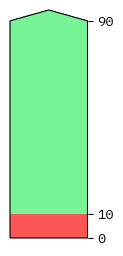

In [476]:

fig, ax = plt.subplots(figsize=(1, 6))
fig.subplots_adjust(bottom=0.5)

cmap = mcolors.ListedColormap(['#ff3a3ad9', '#61f286d9'])
bounds = [0,10,90]
norm = mcolors.BoundaryNorm(bounds, cmap.N)
cbar = colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, ticks=bounds, extend='max', spacing='proportional', orientation='vertical')

fig.show()

In [586]:
# from https://www2.keck.hawaii.edu/inst/common/TelLimits.html
# 0 for not visible
# 1 for vignetted
# 2 for visible
def keck_ii_visibility(alt, az):
    if 185.3 <= az < 332.8:
        if 36.8 <= alt < 89.5:
            return 2
        else:
            return 0
    else:
        if 0.0 <= alt < 18.0:
            return 1
        elif 18.0 <= alt < 89.5:
            return 2
        else:
            return 0

In [587]:
def moon_sep_visiblity(moon_sep):
    if moon_sep < 5:
        return False
    else:
        return True

def check_visibility(alt, az):
    if alt < 0:
        return 0
    else:
        return keck_ii_visibility(alt, az)

-32.811765953439 313.72925931669164 0
-33.05683619346837 314.0044220340072 0
-33.30076778576305 314.28178658810845 0
-33.543545878580446 314.5613711090917 0
-33.78515543495204 314.8431936752877 0
-34.02558123178529 315.12727230283053 0
-34.26480785903386 315.41362493480943 0
-34.502819718965526 315.70226943002626 0
-34.739601025487694 315.9932235512955 0
-34.97513580359616 316.28650495335324 0
-35.20940788888432 316.58213117028413 0
-35.44240092718666 316.8801196025443 0
-35.67409837429372 317.18048750348777 0
-35.90448349581066 317.48325196547455 0
-36.13353936709994 317.7884299054711 0
-36.3612488733724 318.0960380502117 0
-36.58759470988906 318.4060929208614 0
-36.8125593823032 318.7186108172046 0
-37.03612520713482 319.03360780133715 0
-37.258274312406286 319.3510996808908 0
-37.478988638404424 319.67110199172777 0
-37.69824993862557 319.99362998017676 0
-37.916039780868815 320.3186985847484 0
-38.132339548506536 320.64632241736314 0
-38.347130441930524 320.976515744081 0
-38.56039

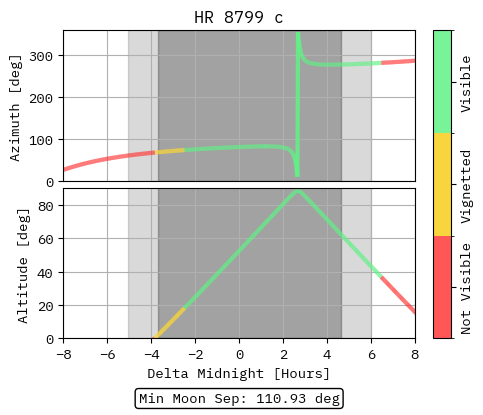

-10.328914461429427 171.99661891736235 0
-10.281766028346778 172.05797928469343 0
-10.234978953333266 172.1196155671285 0
-10.188554905537488 172.18152559745093 0
-10.142495541646985 172.24370720052505 0
-10.096802505825629 172.30615819332414 0
-10.05147742965253 172.36887638495728 0
-10.006521932057666 172.43185957670127 0
-9.961937619263008 172.4951055620262 0
-9.917726084717378 172.55861212663052 0
-9.87388890903791 172.6223770484681 0
-9.83042765994527 172.6863980977849 0
-9.78734389220517 172.75067303714766 0
-9.74463914756396 172.81519962148255 0
-9.702314954690303 172.8799755981056 0
-9.66037282911191 172.94499870676188 0
-9.618814273155595 173.01026667966042 0
-9.57764077588626 173.07577724151272 0
-9.536853813047182 173.14152810956952 0
-9.496454846997645 173.2075169936634 0
-9.456445326655432 173.27374159624506 0
-9.416826687434854 173.34019961242777 0
-9.377600351187946 173.4068887300279 0
-9.338767726144884 173.47380662960836 0
-9.300330206854767 173.54095098452268 0
-9.262

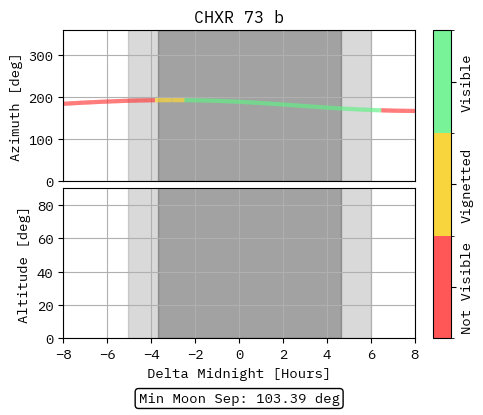

-36.18056456222841 242.20561411304558 0
-36.48127880377735 242.2116291692012 0
-36.78200793442109 242.21637850845215 0
-37.082748431216075 242.21984743206994 0
-37.38349673146567 242.2220208443784 0
-37.684249231174604 242.22288324259878 0
-37.98500228344756 242.22241870636682 0
-38.28575219686125 242.22061088690995 0
-38.586495233751506 242.2174429958734 0
-38.887227608490186 242.21289779378134 0
-39.18794548566466 242.20695757812214 0
-39.4886449782447 242.1996041710412 0
-39.78932214564684 242.190818906631 0
-40.08997299178188 242.18058261780016 0
-40.390593462996485 242.16887562270955 0
-40.69117944598434 242.15567771075737 0
-40.99172676560691 242.14096812809805 0
-41.292231182652124 242.1247255626778 0
-41.592688391509284 242.1069281287698 0
-41.89309401778799 242.08755335098783 0
-42.193443615822915 242.06657814776497 0
-42.49373266612787 242.04397881427082 0
-42.793956572741216 242.01973100475234 0
-43.09411066048769 241.99380971427385 0
-43.39419017214447 241.96618925983475 0


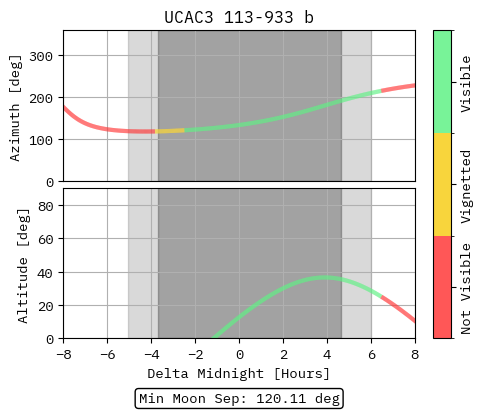

38.66363779808273 148.72193547473665 2
38.839220856760996 149.07812310202544 2
39.01298511679432 149.4366532138054 2
39.18491183179147 149.79752497240477 2
39.354982200782956 150.16073685181505 2
39.52317737416862 150.52628661961438 2
39.68947845987843 150.8941713189503 2
39.85386652976513 151.2643872506494 2
40.01632262619753 151.63692995541527 2
40.17682776889749 152.0117941962406 2
40.335362961973814 152.3889739409618 2
40.49190920119933 152.76846234509702 2
40.646447481484145 153.1502517348954 2
40.79895880458932 153.53433359074162 2
40.94942418703484 153.9206985308458 2
41.09782466823935 154.3093362953546 2
41.24414131886002 154.7002357308503 2
41.3883552493449 155.09338477531705 2
41.53044761868486 155.48877044359057 2
41.67039964337591 155.8863788133735 2
41.808192606560304 156.28619501178457 2
41.943807867373614 156.6882032025735 2
42.077226870465374 157.09238657397063 2
42.20843115570106 157.49872732725353 2
42.33740236803361 157.90720666606114 2
42.464122267538485 158.3178047

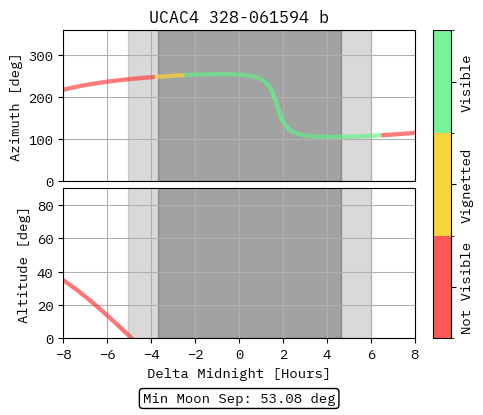

-38.61958287592238 289.2339461070654 0
-38.94032459013338 289.4469651749344 0
-39.26064355075411 289.6619983187885 0
-39.58053120818921 289.8790839848591 0
-39.89997881169666 290.09826141448343 0
-40.21897740362419 290.31957066298264 0
-40.53751781345645 290.5430526189232 0
-40.85559065170074 290.7687490237833 0
-41.173186303544796 290.9967024919857 0
-41.490294922362494 291.2269565313508 0
-41.80690642297123 291.4595555639091 0
-42.123010474725795 291.6945449471321 0
-42.4385964943514 291.93197099551656 0
-42.75365363860014 292.1718810025813 0
-43.068170796634355 292.41432326320614 0
-43.382136582211345 292.65934709636593 0
-43.69553932560241 292.9070028682064 0
-44.0083670652721 293.1573420154756 0
-44.32060753928953 293.4104170692828 0
-44.63224817649822 293.66628167919737 0
-44.9432760873775 293.9249906376234 0
-45.253678054659666 294.1865999044882 0
-45.563440523636146 294.4511666321754 0
-45.87254959217669 294.7187491907035 0
-46.18099100044309 294.9894071931133 0
-46.48875012029

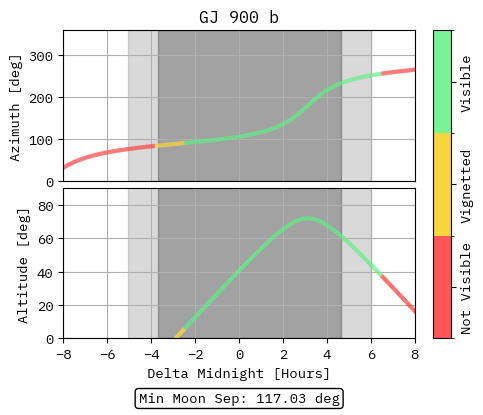

38.258814306558016 288.10737014789436 2
37.935760819572025 288.1470231837648 2
37.61278132753159 288.18745977804355 2
37.289877433449625 288.2286721022522 2
36.96705073539953 288.2706525943558 2
36.64430282704818 288.31339395145545 0
36.321635298185186 288.35688912275083 0
35.999049735215884 288.40113130276825 0
35.676547721679576 288.4461139248348 0
35.35413083871091 288.49183065479826 0
35.031800665536295 288.5382753849733 0
34.70955877991334 288.58544222831455 0
34.387406758606254 288.63332551279666 0
34.065346177805296 288.681919776006 0
33.74337861358191 288.73121975992177 0
33.421505642297205 288.7812204058915 0
33.0997288410257 288.83191684978544 0
32.77804978796054 288.8833044173259 0
32.45647006282171 288.9353786195839 0
32.13499124723381 288.98813514864037 0
31.813614925133418 289.0415698733971 0
31.492342683133707 289.095678835543 0
31.171176110906313 289.1504582456608 0
30.85011680154888 289.2059044794733 0
30.52916635194856 289.26201407422343 0
30.208326363139054 289.31878

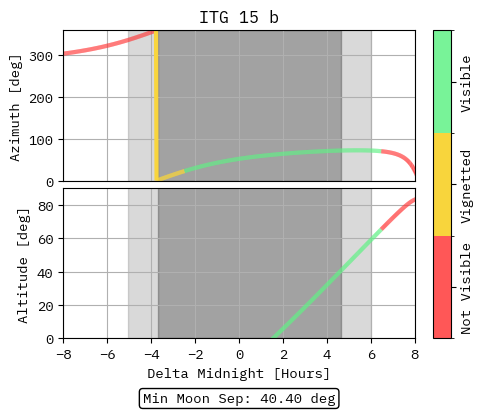

64.96108762030727 195.319669689201 2
64.86892913625853 196.14120569401408 2
64.77210542854222 196.95687845628223 2
64.6706700807068 197.76647085891852 2
64.56467835386415 198.56977801687265 2
64.45418705424835 199.3666073698351 2
64.33925440109657 200.1567787237439 2
64.21993989543266 200.94012424343603 2
64.09630419032928 201.7164883988108 2
63.9684089631321 202.485727867442 2
63.8363167901517 203.24771139631667 2
63.70009102421477 204.00231962595888 2
63.55979567549478 204.74944487983674 2
63.415495295922696 205.48899092244295 2
63.26725486751013 206.22087268902268 2
63.1151396948009 206.94501599030872 2
62.95921530168572 207.6613571952467 2
62.79954733273355 208.36984289483533 2
62.6362014591787 209.07042954999073 2
62.469243289639635 209.76308312634632 2
62.298738285657755 210.44777871856567 2
62.124751682046195 211.12450016688993 2
61.94734841207593 211.79323966819896 2
61.76659303745328 212.4539973839035 2
61.58254968304029 213.10678104672687 2
61.395281976240845 213.751605568296

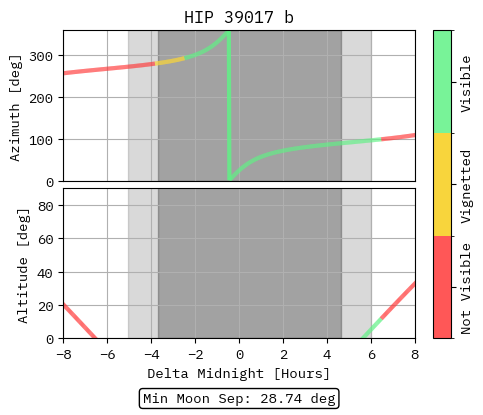

37.80397232584417 289.20620231148513 2
37.48300303771812 289.24244347441646 2
37.16210543047691 289.2795236930957 2
36.84128127218758 289.3174344111129 2
36.520532323533544 289.35616735303 0
36.199860338428486 289.39571451677637 0
35.8792670646238 289.4360681663206 0
35.55875424427786 289.4772208246122 0
35.2383236145477 289.519165266775 0
34.917976908122064 289.56189451355243 0
34.59771585378715 289.6054018249826 0
34.277542176933345 289.649680694307 0
33.95745760009602 289.69472484209126 0
33.63746384343851 289.74052821056154 0
33.31756262526867 289.7870849581366 0
32.9977556625075 289.834389454159 0
32.678044671170845 289.8824362738096 0
32.35843136683123 289.93122019320276 0
32.038917465081056 289.98073618465264 0
31.719504681963794 290.03097941210996 0
31.400194734433203 290.08194522675205 0
31.080989340768642 290.13362916273394 0
30.76189022100611 290.1860269330827 0
30.44289909735355 290.23913442573826 0
30.124017694601058 290.2929476997297 0
29.805247740523242 290.3474629814861

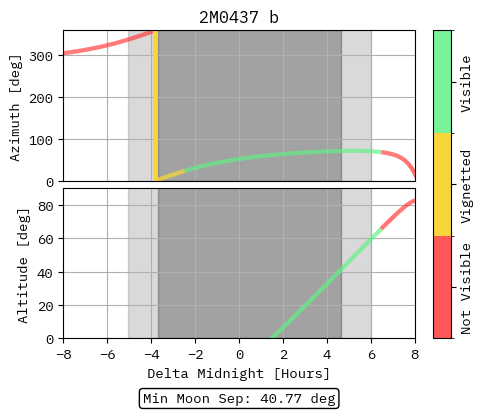

3.8890114716514206 262.34463405006744 0
3.552067692120174 262.47012538646 0
3.2150264665785215 262.5953079481457 0
2.877889638625735 262.72019062927137 0
2.540659033986229 262.8447822723563 0
2.203336461011504 262.96909167053985 0
1.8659237111854836 263.0931275698085 0
1.5284225595991323 263.21689867121773 0
1.1908347654579552 263.34041363308614 0
0.8531620725362972 263.4636810731937 0
0.5154062096743355 263.5867095709515 0
0.17756889122071168 263.7095076695783 0
-0.16034818248154345 263.8320838782502 0
-0.4983433246630141 263.95444667426005 0
-0.8364148616535644 264.0766045051516 0
-1.1745611324525307 264.1985657908621 0
-1.51278048827875 264.32033892585144 0
-1.8510712921357135 264.4419322812296 0
-2.189431918369929 264.56335420687816 0
-2.5278607522575864 264.6846130335782 0
-2.866356189556561 264.8057170751229 0
-3.204916636100062 264.9266746304444 0
-3.54354050736871 265.0474939857324 0
-3.882226228074992 265.1681834165586 0
-4.220972231748655 265.2887511900031 0
-4.55977696032614

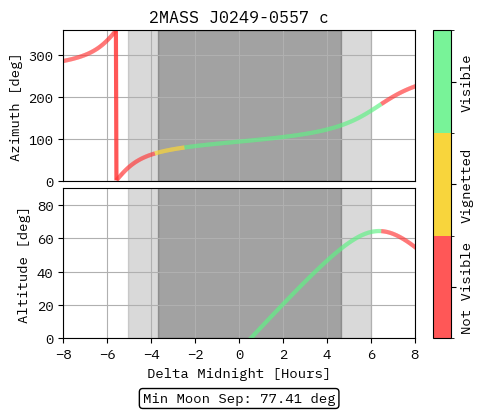

28.115485203220107 282.9504848872904 0
27.784261710613833 283.03250995700876 0
27.45314816580158 283.11485080149265 0
27.122145678119068 283.1975099391583 0
26.791255368031155 283.28048992263376 0
26.460478367284235 283.3637933389073 0
26.129815819071577 283.4474228094832 0
25.799268878176903 283.5313809905545 0
25.468838711159258 283.61567057317666 0
25.138526496494052 283.70029428346186 0
24.808333424764232 283.7852548827728 0
24.478260698806253 283.870555167937 0
24.14830953390636 283.95619797145997 0
23.81848115795163 284.04218616175956 0
23.48877681163002 284.1285226433981 0
23.15919774859422 284.21521035733446 0
22.82974523565212 284.30225228117865 0
22.500420552949706 284.3896514294589 0
22.17122499416697 284.47741085389515 0
21.842159866693216 284.565533643688 0
21.51322649184218 284.6540229258066 0
21.18442620503311 284.74288186529606 0
20.855760355998765 284.83211366558714 0
20.527230308987157 284.921721568817 0
20.198837442968532 285.0117088561592 0
19.870583151843512 285.10

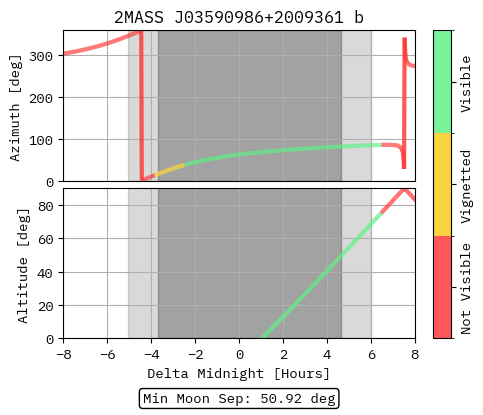

34.5252627387796 287.4237391618111 0
34.20098217832763 287.47661014262997 0
33.87679638827301 287.5301210784023 0
33.55270678963502 287.5842678929647 0
33.22871480636009 287.6390466833429 0
32.90482186565438 287.69445371563995 0
32.58102939832133 287.7504854210754 0
32.25733883907101 287.80713839217213 0
31.933751626862694 287.864409379078 0
31.61026920519785 287.92229528602917 0
31.286893022455928 287.9807931679348 0
30.963624532179416 288.0399002270951 0
30.64046519340212 288.0996138100304 0
30.31741647092755 288.159931404435 0
29.994479835649237 288.2208506362335 0
29.67165676483041 288.2823692667517 0
29.348948742404357 288.34448518998676 0
29.02635725926205 288.4071964299786 0
28.70388381354775 288.4705011382759 0
28.381529910929466 288.534397591499 0
28.059297064903664 288.5988841889856 0
27.737186797062076 288.6639594505298 0
27.415200637380334 288.7296220141997 0
27.093340124496525 288.795870634238 0
26.771606805989975 288.86270417903904 0
26.450002238657643 288.9301216292023 0

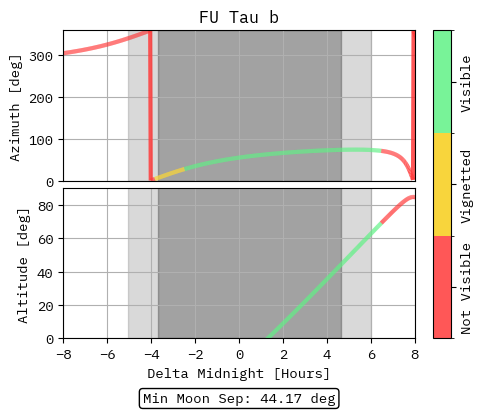

53.701016784156636 27.11667073273073 2
53.85518664982331 26.825638916148108 2
54.00780667189179 26.531199735776504 2
54.15885473867326 26.233346479707674 2
54.308308607419725 25.932073513862253 2
54.456145911304205 25.627376325261217 2
54.602344166800414 25.319251565707674 2
54.74688078148539 25.00769709578185 2
54.88973306224398 24.692712029136008 2
55.030878223919295 24.37429677693427 2
55.17029339837375 24.052453092443717 2
55.30795564400737 23.727184115600963 2
55.4438419556965 23.398494417553103 2
55.577929275197135 23.06639004498434 2
55.71019450197617 22.730878564218433 2
55.84061450450706 22.391969104905776 2
55.96916613200524 22.049672403245953 2
56.095826226616516 21.70400084459393 2
56.22057163604861 21.35496850535086 2
56.34337922665617 21.002591193976425 2
56.464225896951895 20.646886491057803 2
56.58308859156628 20.287873788221784 2
56.699944315626404 19.925574325817276 2
56.81477014955734 19.560011229191872 2
56.92754326429279 19.19120954342964 2
57.03824093688423 18.819

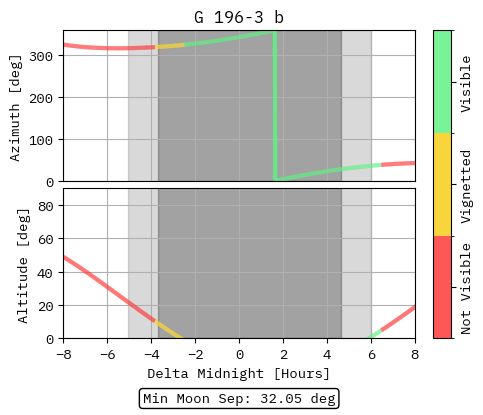

-10.094552494489289 172.16865163367476 0
-10.048419138609965 172.2314054108789 0
-10.00265546426319 172.294428834692 0
-9.95726310552898 172.35771969765477 0
-9.912243683738632 172.42127578443007 0
-9.86759880741172 172.48509487183344 0
-9.823330072194608 172.5491747288625 0
-9.779439060795944 172.6135131167317 0
-9.735927342927337 172.67810778890046 0
-9.692796475238119 172.7429564911113 0
-9.650048001256494 172.80805696141937 0
-9.607683451324677 172.87340693023233 0
-9.565704342540167 172.9390041203418 0
-9.524112178691391 173.00484624696495 0
-9.482908450199124 173.0709310177781 0
-9.442094634053317 173.13725613295887 0
-9.401672193753154 173.20381928522428 0
-9.361642579245972 173.27061815987219 0
-9.322007226867708 173.33765043482146 0
-9.28276755928065 173.4049137806578 0
-9.243924985415996 173.47240586067312 0
-9.20548090041212 173.54012433091336 0
-9.167436685555996 173.6080668402224 0
-9.129793708223819 173.6762310302889 0
-9.092553321822148 173.7446145356935 0
-9.05571686572

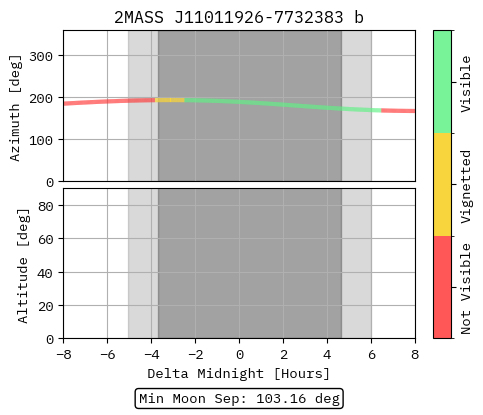

-28.404043360007694 111.185992724339 0
-28.087154813947123 111.24248326307465 0
-27.770388458683804 111.29968105185596 0
-27.453746128858928 111.35758310757342 0
-27.137229664451333 111.4161865946194 0
-26.820840911159657 111.4754888220824 0
-26.504581720790966 111.53548724103523 0
-26.188453951622204 111.59617944192033 0
-25.872459468795665 111.65756315201745 0
-25.556600144666746 111.71963623300636 0
-25.240877859194345 111.78239667860473 0
-24.925294500282824 111.84584261229571 0
-24.60985196416718 111.90997228512511 0
-24.294552155749752 111.9747840735833 0
-23.979396988979435 112.04027647755191 0
-23.664388387191465 112.10644811832908 0
-23.34952828346877 112.17329773671881 0
-23.034818620991086 112.2408241911891 0
-22.720261353393084 112.3090264560927 0
-22.40585844509835 112.37790361995519 0
-22.091611871687963 112.44745488381618 0
-21.777523620232714 112.51767955963689 0
-21.463595689646954 112.58857706875997 0
-21.149830091034012 112.66014694042637 0
-20.836228848031965 112.73

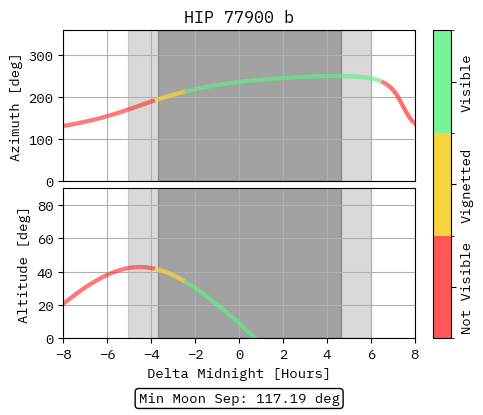

-34.13086955757692 106.31493045011108 0
-33.804682290160756 106.3730587227153 0
-33.478592712483746 106.4317543325576 0
-33.15260211484195 106.49101448127247 0
-32.826711792774006 106.55083651482555 0
-32.50092304732365 106.61121792024448 0
-32.17523718530973 106.67215632247111 0
-31.849655519570135 106.73364948133654 0
-31.524179369241264 106.79569528864342 0
-31.198810059990244 106.85829176536633 0
-30.873548924291832 106.92143705894917 0
-30.54839730165633 106.9851294407131 0
-30.22335653890338 107.04936730335358 0
-29.898427990386676 107.11414915854091 0
-29.573613018263334 107.17947363460276 0
-29.248912992723795 107.24533947430203 0
-28.924329292244046 107.31174553269466 0
-28.599863303826933 107.37869077507094 0
-28.275516423252874 107.44617427497344 0
-27.951290055306924 107.5141952122958 0
-27.627185614041245 107.58275287144718 0
-27.30320452300179 107.6518466395951 0
-26.979348215477103 107.7214760049718 0
-26.655618134739132 107.79164055524852 0
-26.33201573428516 107.862339

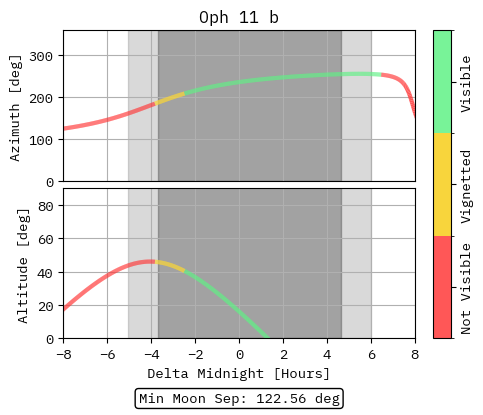

-13.226698203461254 171.42315284956044 0
-13.176131065446441 171.46687304185377 0
-13.125821328835029 171.5108963412136 0
-13.075770796900155 171.55522107753137 0
-13.025981263549287 171.59984557297116 0
-12.976454513271522 171.64476814199284 0
-12.927192321086881 171.689987091374 0
-12.878196452491679 171.735500720235 0
-12.829468663409738 171.78130732005934 0
-12.781010700136882 171.8274051747203 0
-12.732824299292263 171.87379256050124 0
-12.684911187762841 171.9204677461227 0
-12.637273082654762 171.9674289927634 0
-12.589911691237758 172.01467455408755 0
-12.542828710896382 172.06220267626662 0
-12.496025829075576 172.11001159800622 0
-12.44950472322965 172.15809955057048 0
-12.403267060769876 172.2064647578075 0
-12.357314499013556 172.2551054361744 0
-12.311648685129734 172.30401979476542 0
-12.266271256090198 172.35320603533535 0
-12.221183838615312 172.4026623523286 0
-12.176388049123208 172.45238693290509 0
-12.131885493677753 172.50237795696793 0
-12.087677767936874 172.5526

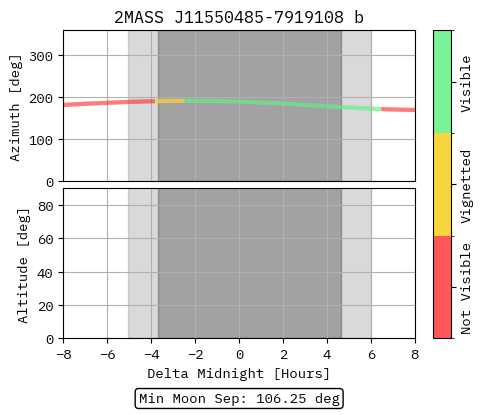

-27.954518449451403 182.60030220986377 0
-27.96976883522085 182.54260111329828 0
-27.9846768648073 182.48477736766606 0
-27.999241804167085 182.42683370312318 0
-28.013462935724544 182.36877285963143 0
-28.027339558436523 182.31059758675121 0
-28.04087098785529 182.2523106434343 0
-28.054056556190993 182.19391479781044 0
-28.066895612370992 182.13541282697906 0
-28.079387522099886 182.07680751679075 0
-28.091531667916083 182.01810166163526 0
-28.103327449248955 181.9592980642197 0
-28.114774282472595 181.90039953535288 0
-28.125871600959996 181.84140889372003 0
-28.136618855134 181.7823289656636 0
-28.147015512518255 181.72316258495584 0
-28.157061057785803 181.66391259257406 0
-28.166754992806524 181.6045818364723 0
-28.176096836692654 181.54517317135353 0
-28.185086125843796 181.48568945843604 0
-28.193722413988873 181.42613356522526 0
-28.20200527222794 181.3665083652775 0
-28.20993428907173 181.30681673796653 0
-28.21750907047969 181.2470615682475 0
-28.22472923989659 181.187245746

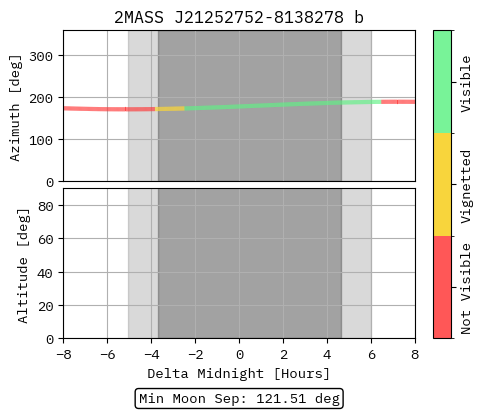

10.388185383093958 159.11630385416257 1
10.50885722907018 159.29747688548272 1
10.628521508030309 159.4794103951932 1
10.747172801381025 159.66210045321174 1
10.86480570781783 159.8455430518872 1
10.981414844071425 160.02973410532726 1
11.096994845658607 160.21466944873956 1
11.211540367649562 160.40034483780735 1
11.3250460854291 160.58675594806473 1
11.437506695481689 160.7738983743197 1
11.548916916167409 160.9617676300729 1
11.65927148852108 161.15035914698626 1
11.768565177042593 161.33966827434864 1
11.876792770509459 161.52969027859254 1
11.983949082780853 161.72042034280952 1
12.090028953620413 161.91185356631306 1
12.195027249517324 162.10398496421402 1
12.298938864516515 162.29680946702848 1
12.401758721050827 162.49032192030657 1
12.503481770786216 162.6845170843033 1
12.60410299545983 162.8793896336555 1
12.703617407734528 163.0749341571094 1
12.802020052050416 163.2711451572638 1
12.899306005482948 163.46801705034807 1
12.995470378604368 163.66554416602963 1
13.09050831634

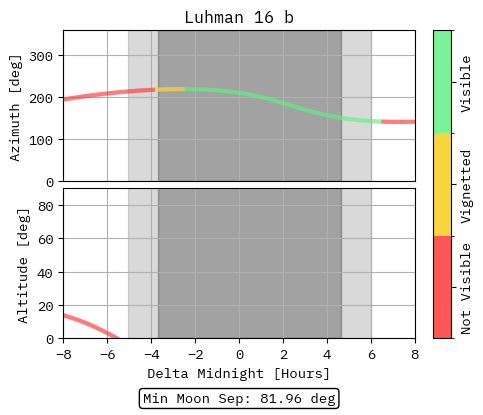

-37.643011237912354 120.44803555937472 0
-37.34995180263567 120.43846290641838 0
-37.05686574768165 120.43031877233112 0
-36.76375734664056 120.42358630565059 0
-36.47063082028278 120.41824907265085 0
-36.17749033836289 120.41429104744252 0
-35.88434002138304 120.41169660235936 0
-35.591183942286264 120.4104504986225 0
-35.2980261281375 120.41053787727411 0
-35.00487056171805 120.41194425037186 0
-34.71172118311895 120.41465549243642 0
-34.41858189125013 120.41865783214406 0
-34.125456545350715 120.42393784425708 0
-33.83234896641864 120.43048244178476 0
-33.539262938642885 120.43827886836756 0
-33.24620221076532 120.44731469087809 0
-32.95317049742852 120.4575777922323 0
-32.66017148048026 120.46905636440421 0
-32.3672088102548 120.48173890163785 0
-32.074286106801516 120.4956141938519 0
-31.781406961116065 120.5106713202285 0
-31.48857493630905 120.52689964298379 0
-31.195793568768007 120.54428880131242 0
-30.903066369283593 120.56282870550186 0
-30.61039682415115 120.58250953121103 

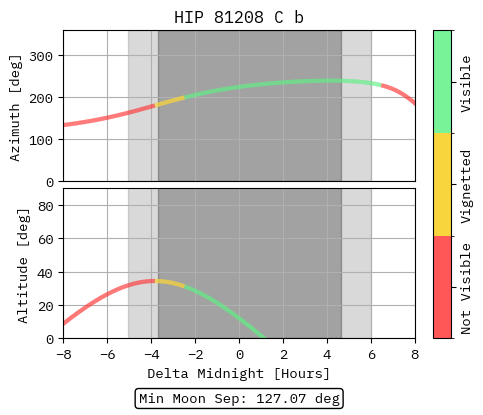

29.86124811052912 282.68769756717626 0
29.529676211113475 282.76755949917134 0
29.19820922298325 282.8477332987068 0
28.866848206790635 282.9282211767097 0
28.53559423356331 283.009025380659 0
28.20444838484683 283.0901481945949 0
27.873411752859365 283.1715919391391 0
27.542485440624716 283.2533589715348 0
27.21167056214631 283.3354516856915 0
26.880968242537147 283.41787251225344 0
26.550379618199667 283.5006239186705 0
26.21990583696013 283.5837084092928 0
25.889548058253155 283.6671285254665 0
25.55930745326068 283.7508868456536 0
25.22918520509978 283.83498598555235 0
24.89918250897396 283.9194285982393 0
24.569300572350958 284.0042173743166 0
24.239540615132388 284.0893550420748 0
23.909903869836654 284.1748443676623 0
23.580391581760527 284.26068815527356 0
23.251005009180528 284.3468892473386 0
22.92174542351993 284.4334505247322 0
22.59261410954236 284.52037490698854 0
22.26361236553907 284.60766535252793 0
21.93474150352079 284.69532485889465 0
21.60600284941084 284.783356463

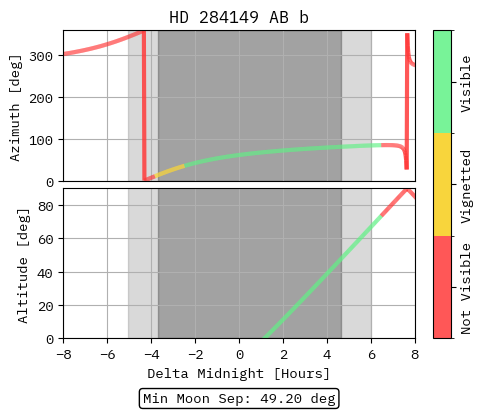

-5.964714168511129 165.64755835689076 0
-5.880705297197955 165.735958717838 0
-5.797206079704385 165.82483242032885 0
-5.714219431301335 165.9141767417502 0
-5.6317482535076975 166.00398894486747 0
-5.5497954339570965 166.0942662777177 0
-5.468363846266169 166.18500597350265 0
-5.387456349895772 166.27620525049088 0
-5.307075790020356 166.36786131191192 0
-5.227224997385024 166.45997134586565 0
-5.147906788172874 166.5525325252215 0
-5.0691239638599415 166.64554200753332 0
-4.990879311080153 166.7389969349443 0
-4.913175601478166 166.8328944341076 0
-4.836015591571948 166.92723161609706 0
-4.759402022605218 167.02200557633228 0
-4.683337620404546 167.11721339449923 0
-4.607825095233103 167.21285213447766 0
-4.532867141645785 167.308918844268 0
-4.458466438338098 167.40541055592874 0
-4.384625648002713 167.50232428550623 0
-4.3113474171765205 167.59965703297817 0
-4.238634376092585 167.6974057821941 0
-4.166489138529128 167.7955675008212 0
-4.094914301658186 167.89413914029348 0
-4.0239

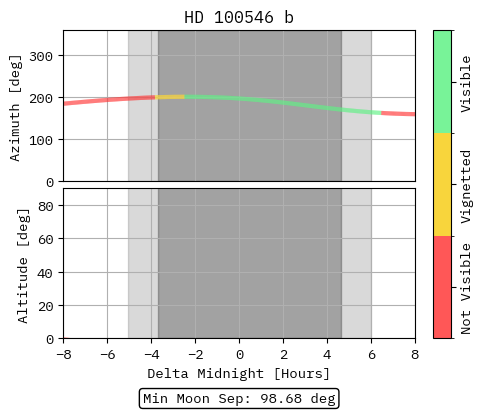

-2.753186481685869 167.13365935813337 0
-2.677801513267768 167.24050869999886 0
-2.603036047246629 167.34778683889783 0
-2.5288928179685555 167.45549051571322 0
-2.4553745417803055 167.56361645208713 0
-2.3824839168445426 167.6721613503701 0
-2.310223622956493 167.78112189357174 0
-2.238596321354781 167.8904947453237 0
-2.167604654540097 168.00027654983487 0
-2.097251246083337 168.11046393186595 0
-2.0275387004434804 168.2210534966935 0
-1.9584696027747996 168.3320418300943 0
-1.8900465187438256 168.44342549831893 0
-1.822271994335804 168.55520104808582 0
-1.7551485556706807 168.6673650065649 0
-1.6886787088105142 168.77991388137931 0
-1.6228649395719865 168.8928441606039 0
-1.5577097133360804 169.00615231277217 0
-1.493215474860337 169.11983478688504 0
-1.4293846480858463 169.23388801243243 0
-1.3662196359518346 169.34830839940756 0
-1.3037228202028714 169.46309233833873 0
-1.2418965612009756 169.57823620031854 0
-1.1807431977359515 169.69373633704092 0
-1.1202650468363633 169.8095890

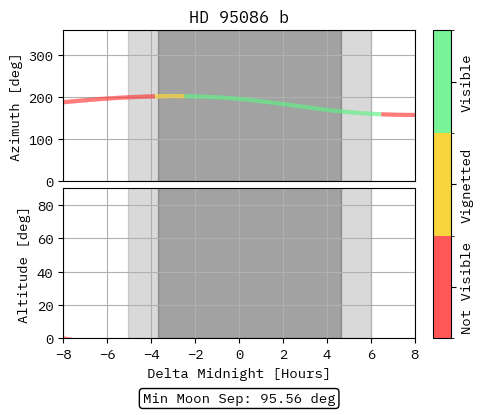

7.573728084457589 191.70751996839923 0
7.504268589458621 191.87412862487275 0
7.43384306498344 192.04029740528023 0
7.362454671959194 192.2060209650017 0
7.290106605481689 192.37129400506805 0
7.216802094350732 192.53611127234203 0
7.142544400606342 192.70046755967746 0
7.06733681905903 192.8643577060744 0
6.991182676827471 193.02777659679847 0
6.914085332865235 193.19071916350742 0
6.8360481774977275 193.35318038433775 0
6.757074631947852 193.5151552839991 0
6.677168147872564 193.67663893382962 0
6.596332206888056 193.83762645185843 0
6.514570320106093 193.99811300283068 0
6.431886027661434 194.1580937982354 0
6.348282898245269 194.3175640963068 0
6.263764528636803 194.47651920201542 0
6.17833454323818 194.63495446703902 0
6.091996593604357 194.79286528973017 0
6.004754357983314 194.95024711505135 0
5.916611540848193 195.1070954345129 0
5.827571872436589 195.26340578608563 0
5.737639108289441 195.41917375410324 0
5.646817028791476 195.57439496914964 0
5.555109438713471 195.72906510793

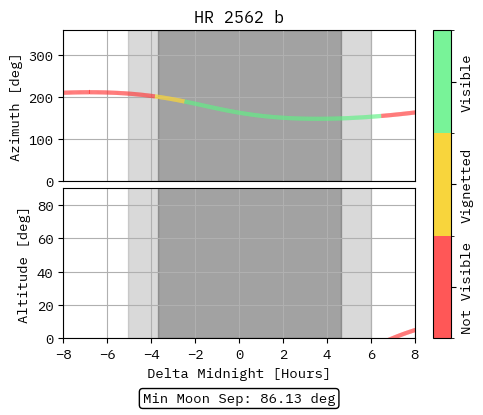

36.06986881522126 289.0429639267802 0
35.74858770531933 289.0851371700554 0
35.427389156585555 289.12808472715506 0
35.1062748465596 289.17179981902063 0
34.78524644954654 289.21627590214877 0
34.46430563712073 289.2615066625613 0
34.14345407862823 289.3074860099911 0
33.822693441654984 289.3542080722808 0
33.50202539252239 289.4016671899767 0
33.18145159672782 289.44985791112276 0
32.860973719422105 289.4987749862325 0
32.54059342583172 289.548413363448 0
32.220312381718664 289.5987681838626 0
31.900132253785948 289.6498347770164 0
31.580054710120198 289.7016086565443 0
31.26008142058938 289.754085515983 0
30.940214057256654 289.80726122472197 0
30.620454294777605 289.8611318240985 0
30.300803810801316 289.9156935236273 0
29.98126428634253 289.97094269736726 0
29.66183740618421 290.02687588040834 0
29.34252485923893 290.0834897654875 0
29.023328338928245 290.14078119971964 0
28.704249543548947 290.1987471814433 0
28.385290176636243 290.25738485717676 0
28.066451947321365 290.316691518

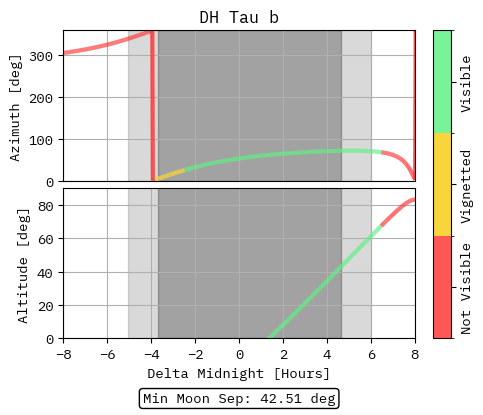

23.67464035328486 84.94612005917651 2
24.013270578563468 85.05559826607279 2
24.351956807581445 85.16515732050324 2
24.690697844946 85.27480557014539 2
25.029492496231754 85.38455145118218 2
25.368339567647368 85.4944034917547 2
25.707237865687095 85.60437031550143 2
26.046186196801937 85.71446064519904 2
26.38518336702597 85.82468330648784 2
26.724228181644996 85.93504723171387 2
27.063319444810205 86.04556146386052 2
27.40245595919527 86.15623516060582 2
27.741636525597638 86.26707759847771 2
28.080859942582705 86.3780981771442 2
28.420125006072936 86.48930642381134 2
28.759430508969984 86.60071199776282 2
29.098775240743997 86.71232469502519 2
29.438157987025914 86.82415445317581 2
29.77757752917997 86.93621135629199 2
30.11703264389219 87.04850564005913 2
30.456522102710597 87.16104769702292 2
30.79604467161413 87.27384808201771 2
31.135599110546295 87.38691751775676 2
31.475184172947383 87.50026690060284 2
31.81479860527318 87.61390730652249 2
32.15444114650363 87.72784999723336 2

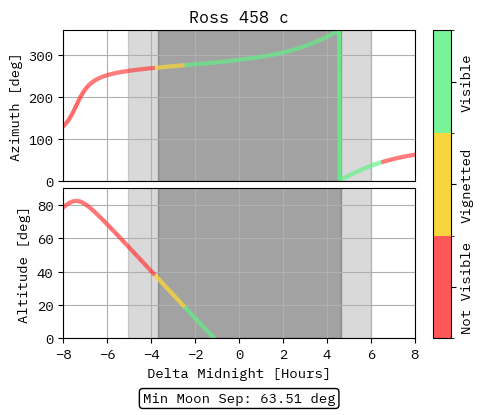

-69.37411787984695 287.2277663132287 0
-69.6984430084708 287.62312596961294 0
-70.02204812767106 288.02944720591796 0
-70.34489657689974 288.4472487728229 0
-70.66694935547187 288.87708038504815 0
-70.98816493969679 289.31952488641696 0
-71.30849908355783 289.7752005774328 0
-71.62790460135012 290.24476371668663 0
-71.94633113042867 290.7289112075931 0
-72.26372487217891 291.2283834823289 0
-72.58002830895376 291.74396759456505 0
-72.89517989468857 292.276500532547 0
-73.20911371649206 292.826872763126 0
-73.52175912444706 293.39603201647833 0
-73.83304032641117 293.98498731916527 0
-74.14287594450224 294.5948132808863 0
-74.45117852952781 295.2266546363959 0
-74.75785402941891 295.881731039263 0
-75.06280120739116 296.561342097432 0
-75.36591100533364 297.26687263192065 0
-75.66706584759744 297.999798128452 0
-75.9661388802893 298.76169033748585 0
-76.262993140939 299.5542229592029 0
-76.55748065350123 300.3791773266309 0
-76.84944144378265 301.23844797045246 0
-77.13870247079785 302.

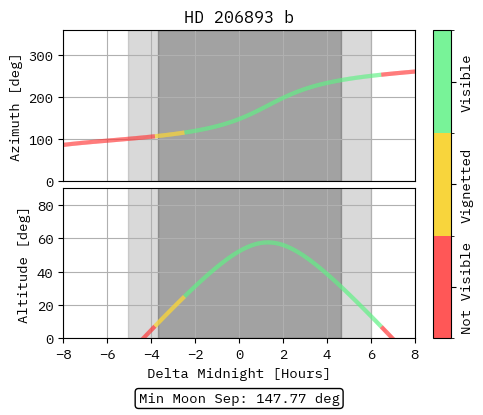

-69.37411787984695 287.2277663132287 0
-69.6984430084708 287.62312596961294 0
-70.02204812767106 288.02944720591796 0
-70.34489657689974 288.4472487728229 0
-70.66694935547187 288.87708038504815 0
-70.98816493969679 289.31952488641696 0
-71.30849908355783 289.7752005774328 0
-71.62790460135012 290.24476371668663 0
-71.94633113042867 290.7289112075931 0
-72.26372487217891 291.2283834823289 0
-72.58002830895376 291.74396759456505 0
-72.89517989468857 292.276500532547 0
-73.20911371649206 292.826872763126 0
-73.52175912444706 293.39603201647833 0
-73.83304032641117 293.98498731916527 0
-74.14287594450224 294.5948132808863 0
-74.45117852952781 295.2266546363959 0
-74.75785402941891 295.881731039263 0
-75.06280120739116 296.561342097432 0
-75.36591100533364 297.26687263192065 0
-75.66706584759744 297.999798128452 0
-75.9661388802893 298.76169033748585 0
-76.262993140939 299.5542229592029 0
-76.55748065350123 300.3791773266309 0
-76.84944144378265 301.23844797045246 0
-77.13870247079785 302.

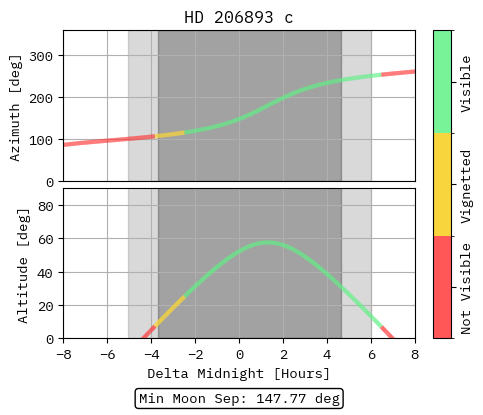

-50.138142896235976 329.0789905376719 0
-50.31160969935731 329.55274020893233 0
-50.48264350455529 330.0303733215095 0
-50.65121252830101 330.51188481925806 0
-50.81728490241684 330.99726759371384 0
-50.98082869250744 331.4865124200389 0
-51.14181191718773 331.9796078936929 0
-51.30020256812368 332.47654036808 0
-51.455968630852425 332.97729389328373 0
-51.60907810641794 333.4818501562339 0
-51.759499033768705 333.99018842238644 0
-51.9071995129512 334.5022854792893 0
-52.0521477290421 335.0181155821295 0
-52.194311976844226 335.53765040164626 0
-52.33366068628543 336.0608589745161 0
-52.470162448533394 336.5877076565926 0
-52.60378604277296 337.1181600791573 0
-52.73450046363 337.65217710849504 0
-52.86227494919963 338.1897168090155 0
-52.987079009654956 338.7307344102363 0
-53.10888245637149 339.2751822777825 0
-53.227655431551284 339.82300988877716 0
-53.343368438275476 340.37416381177064 0
-53.45599237094574 340.9285876915037 0
-53.5654985460555 341.48622223872064 0
-53.67185873323

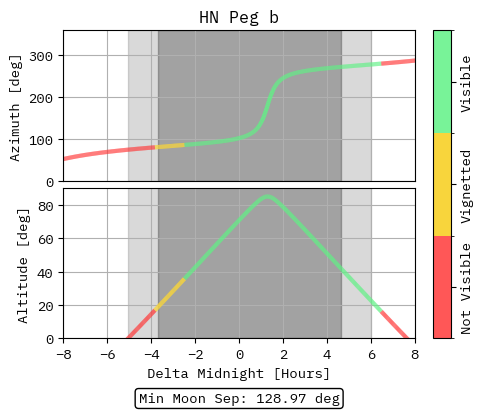

-11.90951720923542 155.38718433747889 0
-11.768099453858724 155.44495951586026 0
-11.626995533817889 155.50350018795646 0
-11.486209722303391 155.56280418280164 0
-11.345746286254073 155.62286933368318 0
-11.205609486404015 155.68369347781876 0
-11.065803577330666 155.7452744560281 0
-10.92633280748989 155.80761011240773 0
-10.78720141926394 155.8706982939956 0
-10.648413648986875 155.9345368504422 0
-10.509973726986892 155.99912363367108 0
-10.371885877605264 156.06445649754545 0
-10.234154319232019 156.13053329752435 0
-10.096783264318493 156.1973518903259 0
-9.95977691940585 156.26491013357955 0
-9.823139485134021 156.33320588548415 0
-9.686875156257551 156.40223700445978 0
-9.550988121653486 156.4720013487999 0
-9.415482564330356 156.54249677631955 0
-9.28036266142403 156.61372114400754 0
-9.145632584205515 156.68567230766863 0
-9.011296498069886 156.75834812157294 0
-8.87735856253199 156.83174643809858 0
-8.743822931214684 156.905865107375 0
-8.61069375183457 156.980701976925 0
-8

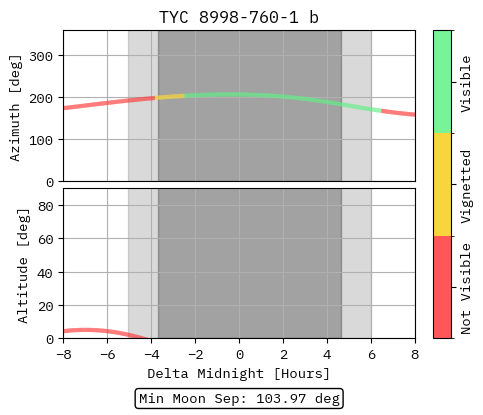

-11.90951720923542 155.38718433747889 0
-11.768099453858724 155.44495951586026 0
-11.626995533817889 155.50350018795646 0
-11.486209722303391 155.56280418280164 0
-11.345746286254073 155.62286933368318 0
-11.205609486404015 155.68369347781876 0
-11.065803577330666 155.7452744560281 0
-10.92633280748989 155.80761011240773 0
-10.78720141926394 155.8706982939956 0
-10.648413648986875 155.9345368504422 0
-10.509973726986892 155.99912363367108 0
-10.371885877605264 156.06445649754545 0
-10.234154319232019 156.13053329752435 0
-10.096783264318493 156.1973518903259 0
-9.95977691940585 156.26491013357955 0
-9.823139485134021 156.33320588548415 0
-9.686875156257551 156.40223700445978 0
-9.550988121653486 156.4720013487999 0
-9.415482564330356 156.54249677631955 0
-9.28036266142403 156.61372114400754 0
-9.145632584205515 156.68567230766863 0
-9.011296498069886 156.75834812157294 0
-8.87735856253199 156.83174643809858 0
-8.743822931214684 156.905865107375 0
-8.61069375183457 156.980701976925 0
-8

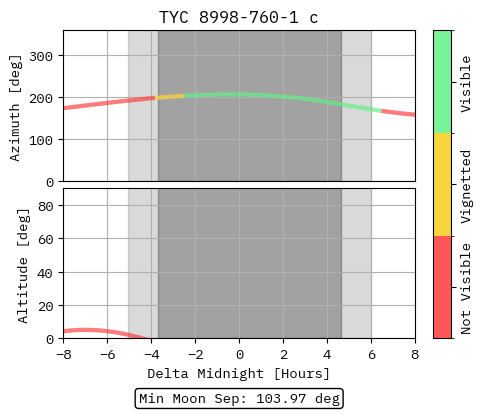

11.080507058470165 204.0686533360626 0
10.941380443513344 204.25157232588137 0
10.801266725956067 204.4336218885809 0
10.660172027218415 204.6147993125596 0
10.518102472662202 204.79510196399244 0
10.375064190892644 204.97452728566012 0
10.231063313077039 205.15307279576166 0
10.08610597226637 205.33073608672973 0
9.940198302746593 205.5075148240159 0
9.793346439382828 205.68340674489173 0
9.645556516997454 205.8584096572162 0
9.496834669740233 206.0325214382213 0
9.34718703049274 206.2057400332651 0
9.196619730264377 206.37806345460407 0
9.045138897622309 206.54948978013502 0
8.892750658116917 206.72001715215262 0
8.739461133731037 206.8896437760897 0
8.58527644233737 207.0583679192588 0
8.430202697173828 207.22618790958524 0
8.274246006320604 207.39310213434908 0
8.117412472207386 207.5591090389058 0
7.959708191116253 207.72420712542385 0
7.801139252708184 207.8883949516087 0
7.641711739558431 208.05167112943022 0
7.481431726704916 208.21403432384878 0
7.320305281208768 208.375483251

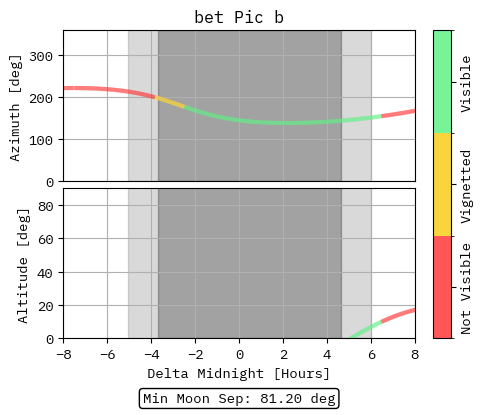

-2.8753343170044188 163.4378308842589 0
-2.7787392682367416 163.54430743443547 0
-2.6827515859100903 163.65132444617146 0
-2.5873746724581395 163.75887897090723 0
-2.492611916371165 163.86696803935965 0
-2.398466691998708 163.9755886613191 0
-2.3049423593532112 164.08473782544743 0
-2.212042263904538 164.19441249908763 0
-2.119769736383582 164.3046096280659 0
-2.0281280925705816 164.4153261365125 0
-1.9371206330948472 164.5265589266724 0
-1.8467506432193472 164.63830487873574 0
-1.7570213926362381 164.75056085065725 0
-1.6679361352476727 164.86332367799693 0
-1.579498108957359 164.9765901737496 0
-1.491710535449487 165.09035712819286 0
-1.4045766199727936 165.20462130873204 0
-1.3180995511197307 165.3193794597538 0
-1.2322825006069182 165.43462830248146 0
-1.147128623047683 165.55036453484408 0
-1.0626410557328931 165.66658483133784 0
-0.9788229184002921 165.78328584290605 0
-0.8956773130088824 165.9004641968164 0
-0.8132073235094421 166.01811649654698 0
-0.7314160156141128 166.1362393

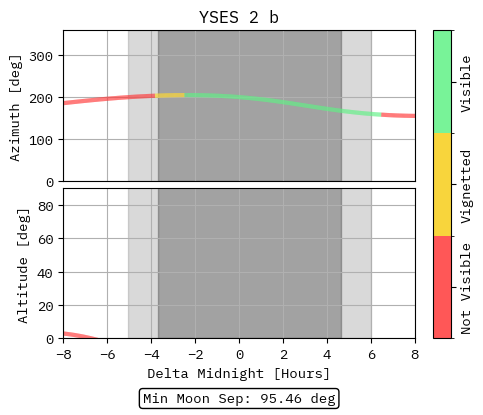

35.96621480483487 237.86130201013282 0
35.67798182575866 238.11393961343538 0
35.388960673407496 238.3642967325191 0
35.0991639394153 238.61240445981528 0
34.808603985647274 238.85829351027908 0
34.5172929484979 239.10199422232157 0
34.225242743136874 239.34353655900108 0
33.93246506767296 239.58295010948254 0
33.638971407289674 239.82026409070093 0
33.34477303827779 240.05550734927476 0
33.0498810320473 240.28870836358783 0
32.75430625903389 240.51989524609047 0
32.458059392584936 240.74909574574158 0
32.16115091273971 240.9763372506434 0
31.863591109987784 241.20164679079204 0
31.5653900889299 241.42505104099047 0
31.266557771897517 241.6465763238697 0
30.967103902500483 241.8662486130314 0
30.66703804912207 242.08409353628724 0
30.366369608330828 242.30013637900865 0
30.065107808264887 242.5144020875377 0
29.763261711921785 242.726915272699 0
29.460840220409704 242.93770021336582 0
29.157852076131 243.146780860093 0
28.85430586590816 243.35418083880316 0
28.55021002404994 243.559923

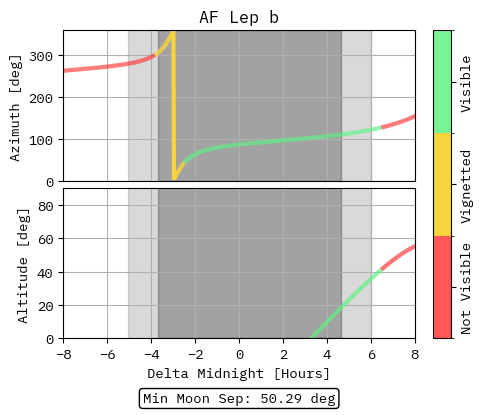

15.60808924225048 110.52919666856512 1
15.9262627714704 110.68554762187662 1
16.24410762401357 110.84286769489584 1
16.56161935116232 111.00117023751041 1
16.87879343335217 111.16046876904805 1
17.19562527881529 111.32077698107483 1
17.512110222186642 111.48210874021649 1
17.828243523104806 111.64447809101898 1
18.14402036474742 111.80789925881795 2
18.459435852381635 111.97238665265782 2
18.77448501183939 112.13795486821425 2
19.089162788007933 112.30461869076642 2
19.403464043244103 112.47239309817148 2
19.717383555802762 112.64129326388793 2
20.03091601818885 112.81133456000012 2
20.34405603551414 112.98253256028617 2
20.656798123797707 113.15490304329668 2
20.96913670824277 113.32846199546057 2
21.28106612146891 113.50322561420644 2
21.5925806017317 113.67921031111631 2
21.903674291071702 113.85643271507826 2
22.214341233461933 114.03490967547611 2
22.524575372895786 114.21465826538208 2
22.834370551445925 114.39569578476876 2
23.14372050728319 114.5780397637326 2
23.45261887265811

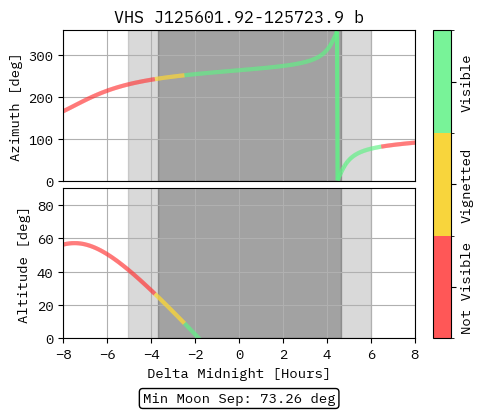

16.146505824426537 262.1719976574539 0
15.809694828393997 262.30771086455997 0
15.47277625991058 262.4429095940799 0
15.135752395412954 262.5776055477415 0
14.798625481950689 262.71181029315215 0
14.46139773797846 262.8455352674885 0
14.124071354142082 262.97879178111566 0
13.78664849402455 263.1115910211499 0
13.449131294915471 263.2439440549427 0
13.111521868518834 263.3758618335227 0
12.773822301694459 263.5073551949586 0
12.436034657136942 263.6384348676838 0
12.098160974089577 263.76911147374693 0
11.760203268996335 263.8993955320274 0
11.42216353618846 264.0292974613812 0
11.08404374851911 264.15882758375136 0
10.74584585801054 264.2879961272213 0
10.407571796479099 264.41681322902514 0
10.069223476159955 264.54528893850926 0
9.730802790296782 264.6734332200598 0
9.392311613759059 264.8012559559738 0
9.053751803611751 264.9287669493045 0
8.715125199699411 265.05597592665924 0
8.376433625212401 265.182892540963 0
8.03767888724541 265.30952637418665 0
7.698862777346261 265.43588694

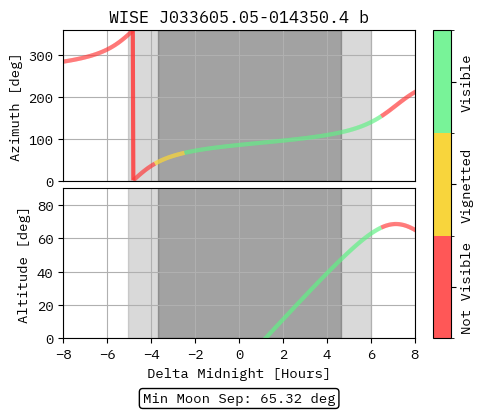

-33.23505050080394 2.521925035769189 0
-33.219071990342094 2.866919409293269 0
-33.20104988085192 3.2117028383277404 0
-33.18098614912522 3.5562501959276567 0
-33.15888299295994 3.900536454731984 0
-33.13474282998426 4.2445366972845076 0
-33.108568296367174 4.5882261262256545 0
-33.080362245414484 4.931580074380211 0
-33.05012774605696 5.27457401466585 0
-33.01786808122523 5.617183569900611 0
-32.983586746122114 5.959384522401919 0
-32.94728744638515 6.301152823466856 0
-32.908974096151354 6.642464602626112 0
-32.868650816016185 6.983296176760759 0
-32.82632193089991 7.323624058977337 0
-32.78199196781407 7.6634249673201795 0
-32.73566565353774 8.002675833249313 0
-32.687347912202775 8.341353809911638 0
-32.63704386279306 8.67943628017749 0
-32.58475881655616 9.016900864470589 0
-32.530498274338996 9.353725428323859 0
-32.47426792383981 9.689888089730562 0
-32.41607363678846 10.025367226224102 0
-32.355921466053424 10.360141481714559 0
-32.29381764268021 10.694189773067327 0
-32.229768

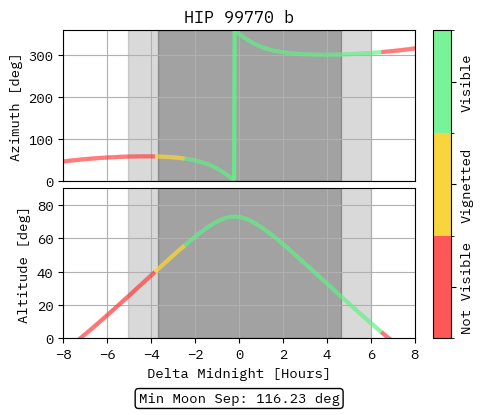

-42.01088514420222 343.6294640528944 0
-42.10550571508323 344.0466090806661 0
-42.197742242481546 344.46533821028896 0
-42.28758084494121 344.88561981089896 0
-42.375007898649095 345.3074213870567 0
-42.460010046758626 345.7307095867119 0
-42.542574208649754 346.1554502102381 0
-42.62268758912138 346.5816082205934 0
-42.70033768748613 347.0091477545311 0
-42.77551230657573 347.4380321349769 0
-42.848199561619325 347.868223884451 0
-42.91838788900423 348.2996847396606 0
-42.986066054882926 348.7323756671336 0
-43.05122316363342 349.1662568800146 0
-43.113848666139255 349.60128785589023 0
-43.173932367892505 350.0374273557448 0
-43.23146443689381 350.4746334439506 0
-43.28643541134221 350.91286350932035 0
-43.33883620709762 351.3520742871763 0
-43.388658124908915 351.7922218824576 0
-43.43589285738392 352.233261793761 0
-43.48053249570142 352.67514893838546 0
-43.52256953604277 353.1178376782697 0
-43.561996885736406 353.5612818468327 0
-43.598807869102366 354.00543477666736 0
-43.632996

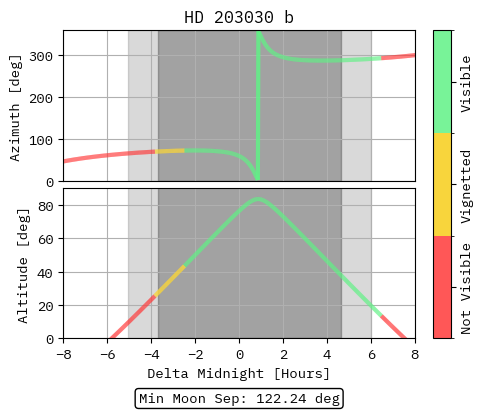

30.021254349408295 254.91552576550936 0
29.692909879556964 255.08859267369746 0
29.364302126921594 255.2604312596965 0
29.035435895271785 255.43106372535394 0
28.706315895416093 255.60051188554306 0
28.376946747572877 255.76879717720522 0
28.04733298368654 255.93594066818088 0
27.717479049657083 256.1019630658533 0
27.38738930754709 256.26688472557623 0
27.05706803768369 256.4307256589342 0
26.72651944075061 256.59350554179224 0
26.395747639777177 256.7552437221869 0
26.064756682120926 256.9159592280168 0
25.733550541350553 257.07567077458225 0
25.402133119124326 257.23439677193335 0
25.07050824698071 257.3921553320727 0
24.738679688105403 257.5489642759843 0
24.406651139041763 257.70484114051163 0
24.074426231366967 257.8598031850772 0
23.742008533301224 258.0138673982647 0
23.40940155131206 258.1670505042375 0
23.076608731640764 258.31936896903426 0
22.743633461813207 258.4708390067138 0
22.41047907210351 258.6214765853714 0
22.077148836962095 258.771297433022 0
21.743645976406352 25

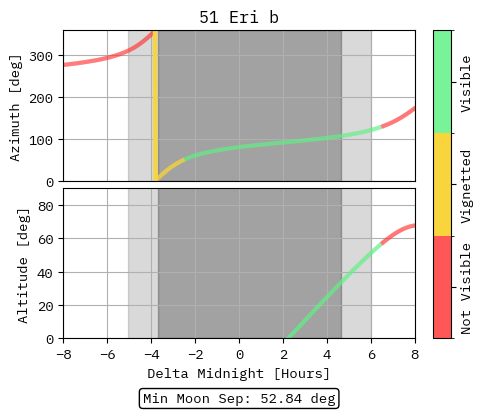

3.72291941099807 181.90405625039722 1
3.7111967601726135 182.04869717725714 1
3.698616751664632 182.19326376765127 1
3.6851799217650076 182.3377507960156 1
3.6708868430384274 182.48215304379121 1
3.655738124249151 182.62646529987398 1
3.639734410282426 182.77068236105714 1
3.62287638206038 182.9147990324812 1
3.6051647564552294 183.05881012806387 1
3.586600286195734 183.20271047094712 1
3.5671837597716025 183.34649489391975 1
3.546916001331026 183.49015823985738 1
3.5257978705764845 183.63369536213804 1
3.5038302626534144 183.7771011250745 1
3.4810141080374395 183.92037040432274 1
3.4573503724150596 184.06349808730295 1
3.4328400565613926 184.20647907360578 1
3.407484196213423 184.34930827539924 1
3.3812838619396977 184.49198061782593 1
3.3542401590043176 184.63449103940616 1
3.3263542272297237 184.77683449242014 1
3.2976272408527874 184.91900594330147 1
3.268060408378642 185.06100037301474 1
3.2376549724303714 185.20281277743257 1
3.2064122095947263 185.34443816770593 0
3.174333430264

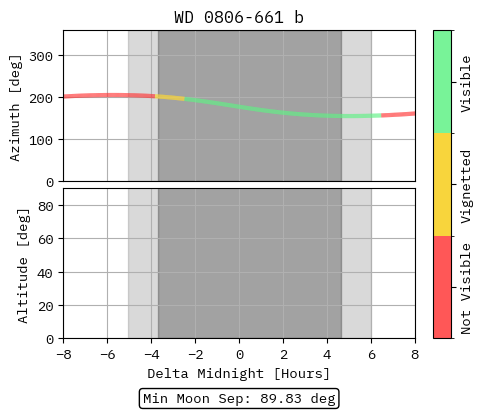

-6.604018946960623 142.874956698911 0
-6.399071945058225 142.9666211994969 0
-6.194561309391972 143.0592305848531 0
-5.9904920501339465 143.15278407185687 0
-5.78686918905046 143.24728090492985 0
-5.583697759704184 143.34272035514675 0
-5.380982807656976 143.43910171933774 0
-5.178729390652311 143.53642431919496 0
-4.9769425788154855 143.63468750036486 0
-4.775627454819721 143.73389063155076 0
-4.574789114075327 143.83403310359782 0
-4.374432664884118 143.93511432858904 0
-4.1745632286162575 144.03713373892288 0
-3.9751859398524334 144.14009078640183 0
-3.776305946547629 144.24398494130273 0
-3.5779284101653817 144.34881569145512 0
-3.380058505819864 144.4545825413077 0
-3.182701422405624 144.56128501099423 0
-2.985862362726846 144.6689226353909 0
-2.789546543606008 144.77749496317753 0
-2.593759196008229 144.88700155588145 0
-2.398505565136434 144.9974419869289 0
-2.2037909105345395 145.10881584068375 0
-2.0096205061778614 145.22112271148404 0
-1.8159996405580974 145.33436220267274 0


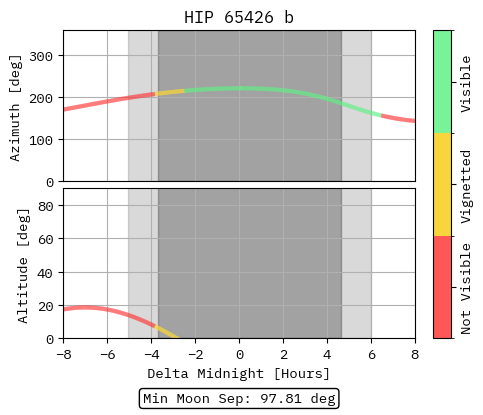

-40.908290824587944 123.69071524144903 0
-40.62539298737172 123.65080117710711 0
-40.342366864260036 123.61266733574841 0
-40.059218391639064 123.57629026829972 0
-39.77595341289085 123.54164706671511 0
-39.492577681208246 123.50871535154756 0
-39.20909686233851 123.47747325984207 0
-38.92551653722902 123.44789943333953 0
-38.64184220463073 123.41997300698912 0
-38.35807928358998 123.39367359775441 0
-38.07423311591075 123.36898129371336 0
-37.79030896850807 123.34587664343758 0
-37.50631203573746 123.32434064565102 0
-37.22224744161934 123.3043547391538 0
-36.93812024204229 123.2859007930111 0
-36.653935426873716 123.26896109699453 0
-36.369697922033716 123.253518352274 0
-36.08541259150464 123.23955566235043 0
-35.80108423929618 123.22705652422545 0
-35.51671761133795 123.21600481979914 0
-35.23231739735448 123.20638480749345 0
-34.947888232659444 123.1981811140917 0
-34.66343469992357 123.19137872679089 0
-34.37896133088996 123.18596298546048 0
-34.0944726080466 123.181919575102 0
-

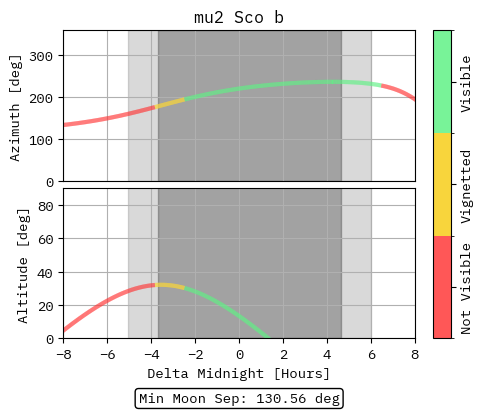

-35.226920150506146 107.80002472568381 0
-34.9033136947428 107.84956021209845 0
-34.5797979389418 107.8997740185284 0
-34.25637436225492 107.9506612160704 0
-33.93304444501517 108.0022170688097 0
-33.60980966911403 108.05443702907517 0
-33.28667151838213 108.10731673286654 0
-32.96363147893965 108.16085199545226 0
-32.64069103957848 108.2150388071221 0
-32.317851692093356 108.26987332910127 0
-31.99511493165397 108.32535188960544 0
-31.672482257125463 108.38147098004646 0
-31.349955171430125 108.43822725136776 0
-31.02753518185829 108.49561751051996 0
-30.705223800419677 108.55363871705626 0
-30.38302254415289 108.61228797985706 0
-30.060932935454524 108.67156255396903 0
-29.738956502394082 108.73145983755947 0
-29.417094779036272 108.79197736897912 0
-29.095349305736445 108.8531128239349 0
-28.773721629469655 108.91486401275802 0
-28.452213304121035 108.9772288777776 0
-28.13082589079633 109.04020549078456 0
-27.80956095812199 109.10379205058939 0
-27.48842008254441 109.16798688066771

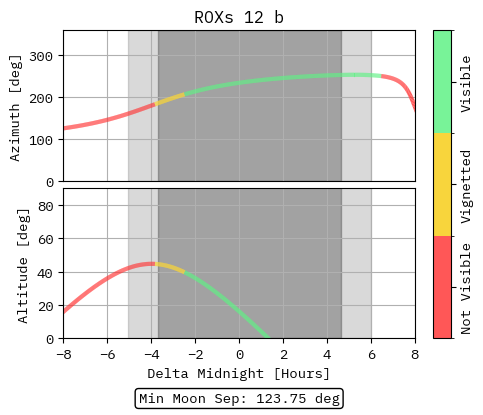

49.616285659266886 286.1758065270598 2
49.28982804926855 286.1876453279014 2
48.96339100320914 286.2006710482785 2
48.636976483183666 286.2148612354252 2
48.31058641948701 286.23019420467443 2
47.98422271213282 286.24664901052404 2
47.657887232316945 286.2642054190272 2
47.33158182379535 286.2828438814408 2
47.00530830424096 286.30254550906255 2
46.6790684664997 286.3232920491994 2
46.35286407984025 286.34506586220516 2
46.02669689110729 286.3678498995386 2
45.700568625873906 286.39162768278345 2
45.374480989502494 286.41638328358977 2
45.04843566820819 286.44210130448323 2
44.722434330044145 286.46876686050626 2
44.39647862587168 286.4963655616451 2
44.07057019028396 286.5248834960075 2
43.74471064250536 286.55430721371215 2
43.41890158723468 286.58462371146015 2
43.09314461549393 286.6158204177485 2
42.76744130541075 286.6478851787041 2
42.44179322299654 286.68080624450045 2
42.11620192288882 286.714572256337 2
41.79066894906997 286.7491722339494 2
41.46519583556033 286.78459556363 2

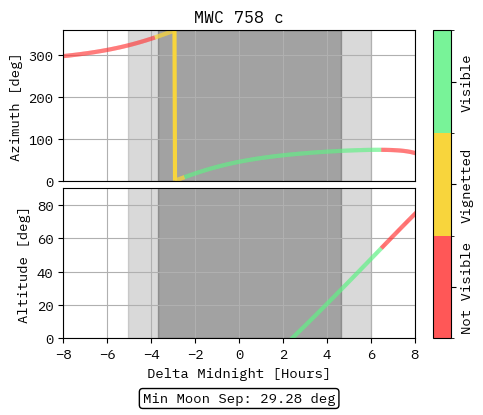

31.755586182913024 264.0227013669368 0
31.417466039601617 264.16677665497724 0
31.07925925801691 264.3100539700963 0
30.740968423030484 264.45255157438345 0
30.40259607495424 264.594287388759 0
30.064144710939782 264.7352790027657 0
29.725616786345864 264.87554368406546 0
29.38701471604105 265.01509838766674 0
29.048340875707034 265.1539597648659 0
28.709597603056825 265.2921441719479 0
28.370787199065877 265.42966767861657 0
28.03191192911937 265.5665460762016 0
27.692974024174937 265.70279488561266 0
27.353975681844343 265.83842936508813 0
27.01491906749148 265.97346451770653 0
26.67580631526074 266.10791509870427 0
26.33663952910121 266.24179562258075 0
25.99742078375244 266.37512037001227 0
25.658152125714402 266.50790339457285 0
25.318835574167306 266.64015852928213 0
24.979473121904963 266.7718993929627 0
24.640066736206375 266.9031393964424 0
24.30061835970874 267.03389174858256 0
23.961129911249422 267.1641694621524 0
23.621603286688376 267.2939853595491 0
23.28204035970856 267

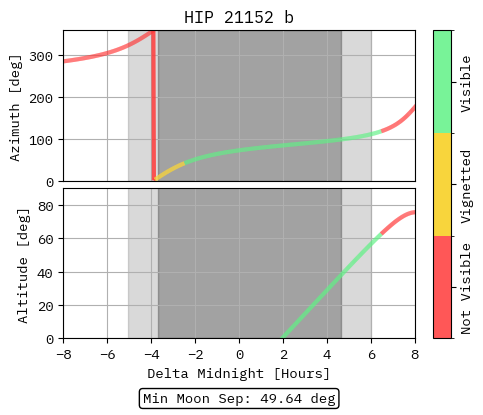

-13.461405032781709 232.6933118260247 0
-13.731912309208807 232.76609457894776 0
-14.002679162311697 232.83793124877357 0
-14.27370177123878 232.9088208303203 0
-14.544976327695556 232.97876222091625 0
-14.816499035430901 233.04775421914835 0
-15.088266109711215 233.11579552358427 0
-15.36027377681039 233.18288473147308 0
-15.63251827346408 233.24902033741287 0
-15.904995846357746 233.31420073199953 0
-16.17770275157144 233.37842420043907 0
-16.450635254059502 233.44168892113981 0
-16.7237896270861 233.50399296426605 0
-16.997162151695868 233.56533429027036 0
-17.270749116141126 233.6257107483852 0
-17.544546815336226 233.6851200750901 0
-17.818551550286806 233.74355989254065 0
-18.09275962752241 233.80102770696516 0
-18.36716735851455 233.85752090702414 0
-18.641771059108795 233.913036762138 0
-18.916567048919863 233.96757242077035 0
-19.191551650751286 234.02112490868012 0
-19.466721189988814 234.07369112712948 0
-19.7420719939942 234.12526785105317 0
-20.017600391491197 234.17585172

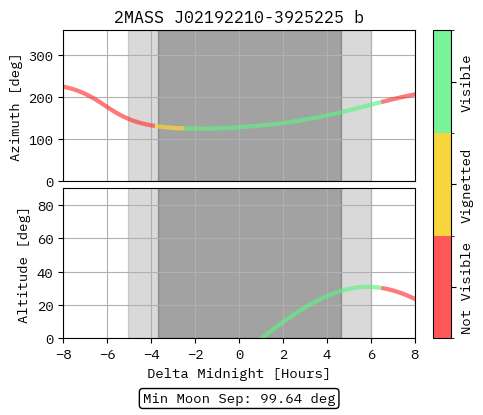

38.361439872420185 284.24219552213015 2
38.03200459718871 284.2988372007113 2
37.702652698852866 284.3560009487266 2
37.373385269258556 284.4136834331405 2
37.044203404347314 284.47188147959264 2
36.71510820438613 284.53059206824537 0
36.386100774204536 284.5898123297929 0
36.0571822234049 284.64953954163474 0
35.72835366660846 284.7097711241928 0
35.39961622365301 284.77050463738254 0
35.070971019835426 284.8317377772153 0
34.74241918610474 284.8934683725423 0
34.41396185930058 284.9556943819189 0
34.085600182342354 285.01841389060013 0
33.757335304462806 285.08162510764663 0
33.42916838140134 285.14532636315045 0
33.101100575620066 285.2095161055662 0
32.77313305650789 285.2741928991484 0
32.44526700059422 285.3393554214876 0
32.117503591737986 285.40500246114874 0
31.789844021352845 285.4711329153942 0
31.46228948859486 285.53774578800454 0
31.134841200573263 285.6048401871805 0
30.807500372552052 285.67241532353034 0
30.480268228152642 285.7404705081359 0
30.153145999555132 285.809

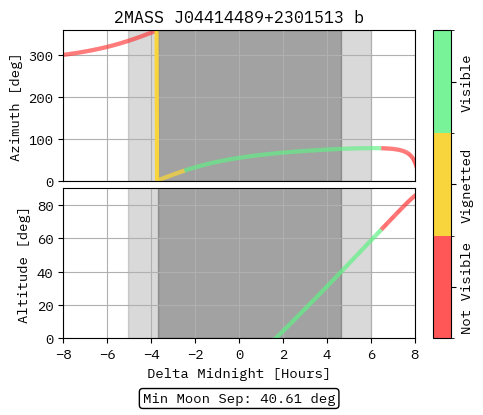

-10.05733384496412 130.66753379811922 0
-9.799661924335343 130.75129660446237 0
-9.542316261973449 130.83602104931384 0
-9.285301147944432 130.92170711579413 0
-9.028620890921278 131.00835486177573 0
-8.772279818637339 131.09596441890355 0
-8.516282278344969 131.18453599162189 0
-8.260632637252971 131.27406985621698 0
-8.005335282991418 131.3645663598572 0
-7.7503946240378125 131.4560259196533 0
-7.495815090177779 131.54844902171334 0
-7.241601132926082 131.64183622021682 0
-6.987757225981905 131.7361881364823 0
-6.734287865644806 131.83150545805333 0
-6.481197571263756 131.92778893777702 0
-6.228490885653748 132.02503939289755 0
-5.976172375528181 132.12325770414745 0
-5.724246631920793 132.22244481484495 0
-5.472718270613029 132.32260172999125 0
-5.2215919325405915 132.42372951537774 0
-4.970872284226029 132.52582929668336 0
-4.720564018180193 132.62890225858504 0
-4.470671853319421 132.73294964386182 0
-4.2212005353732955 132.83797275250166 0
-3.972154837290982 132.94397294080807 0


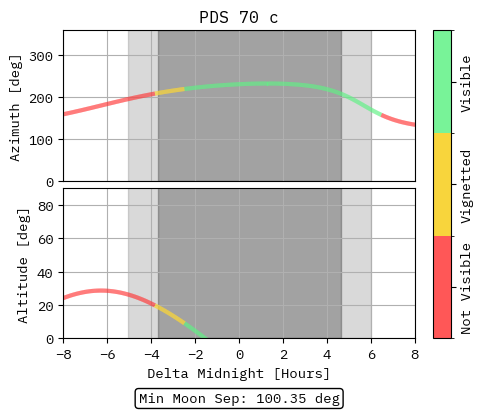

-29.263604478328467 100.4963377745015 0
-28.92941662471192 100.58430369405548 0
-28.595324736158094 100.67246112453535 0
-28.261329815382783 100.76081414653315 0
-27.92743287462342 100.84936683619138 0
-27.593634935785477 100.93812326635177 0
-27.259937030600945 101.02708750767921 0
-26.926340200764585 101.11626362977145 0
-26.592845498111046 101.20565570223859 0
-26.259453984747612 101.29526779577601 0
-25.92616673323675 101.38510398320689 0
-25.592984826732575 101.47516834052037 0
-25.25990935916778 101.565464947881 0
-24.926941435394035 101.65599789063566 0
-24.594082171371802 101.7467712602935 0
-24.261332694322917 101.83778915550292 0
-23.928694142909485 101.92905568300904 0
-23.59616766740462 102.02057495860184 0
-23.26375442987638 102.11235110804992 0
-22.9314556043496 102.2043882680301 0
-22.599272377008287 102.29669058703641 0
-22.26720594636245 102.38926222629016 0
-21.935257523442097 102.48210736063412 0
-21.60342833198469 102.57523017942107 0
-21.271719608626533 102.6686348

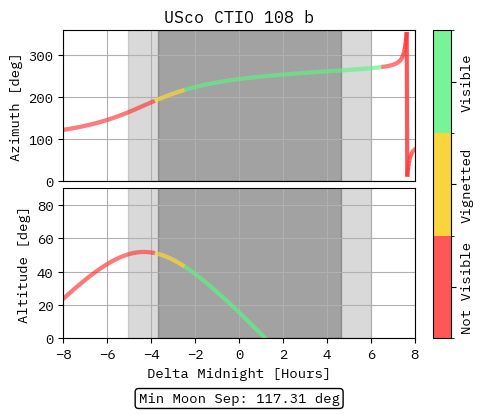

37.7055093336981 283.48917077617705 2
37.37500468749975 283.5506748362324 2
37.044585852047575 283.6126343325415 2
36.71425384687556 283.67504729757786 0
36.384009697271054 283.7379118883011 0
36.053854434454564 283.80122638311735 0
35.723789095768495 283.86498917896023 0
35.39381472484102 283.9291987884957 0
35.06393237178775 283.9938538374319 0
34.7341430933663 284.0589530619483 0
34.404447953177986 284.1244953062181 0
34.07484802182097 284.1904795200421 0
33.74534437709085 284.25690475656825 0
33.41593810413321 284.32377017011316 0
33.08663029564187 284.39107501406426 0
32.75742205201851 284.45881863887354 0
32.42831448155602 284.52700049013015 0
32.09930870061131 284.59562010671283 0
31.770405833788995 284.6646771190171 0
31.44160701410128 284.7341712472596 0
31.11291338316547 284.80410229984597 0
30.784326091364754 284.87447017181364 0
30.45584629803324 284.945274843335 0
30.127475171632717 285.01651637828627 0
29.799213889931615 285.08819492287506 0
29.471063640183168 285.1603107

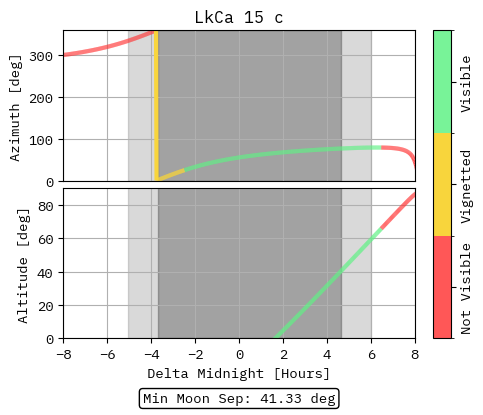

42.00595106417927 293.7827050569903 2
41.694891891421136 293.7824950462017 2
41.383833812731034 293.78361761237153 2
41.0727799936245 293.78605371890626 2
40.76173355538328 293.78978486953827 2
40.45069757679307 293.7947930926107 2
40.139675095832466 293.80106092592587 2
39.828669111283446 293.8085714021334 2
39.517682584324554 293.8173080346378 2
39.2067184400293 293.8272548040043 2
38.8957795688602 293.83839614484316 2
38.584868828070896 293.8507169331548 2
38.273989043107875 293.8642024741162 2
37.963143008924284 293.8788384902931 2
37.65233349129577 293.89461111025963 2
37.341563228060096 293.91150685761176 2
37.03083493034129 293.9295126403582 2
36.720151283727574 293.9486157406741 0
36.409514949424086 293.96880380500494 0
36.098928565349965 293.99006483450745 0
35.788394747238144 294.0123871758123 0
35.47791608966945 294.0357595121006 0
35.16749516709988 294.0601708544793 0
34.857134534850836 294.08561053364554 0
34.54683673007407 294.1120681918301 0
34.236604272688986 294.139533

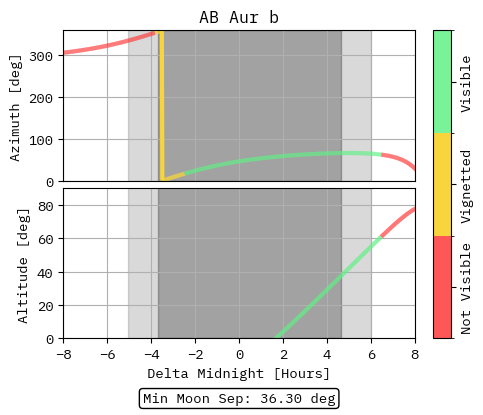

-54.71559115533053 154.59912747426463 0
-54.56895026218919 154.28949763474552 0
-54.42066350634102 153.9833270448539 0
-54.270753580084865 153.68061209004932 0
-54.119243055787976 153.38134797558965 0
-53.96615437842085 153.0855287712078 0
-53.81150985851051 152.79314745537508 0
-53.65533166548759 152.50419595905552 0
-53.49764182144747 152.218665208952 0
-53.338462195276655 151.9365451701138 0
-53.17781449717933 151.65782488794218 0
-53.01572027354812 151.3824925294665 0
-52.852200902216154 151.11053542393375 0
-52.68727758803242 150.84194010259606 0
-52.520971358797524 150.57669233774334 0
-52.35330306150606 150.31477718088476 0
-52.184293358917444 150.05617900010535 0
-52.013962726426335 149.80088151655136 0
-51.84233144923362 149.5488678400438 0
-51.6694196197892 149.30012050378 0
-51.49524713552772 149.05462149815935 0
-51.319833696848576 148.81235230366983 0
-51.143198805361024 148.57329392287434 0
-50.96536176236762 148.33742691147165 0
-50.78634166758139 148.1047314084376 0
-50

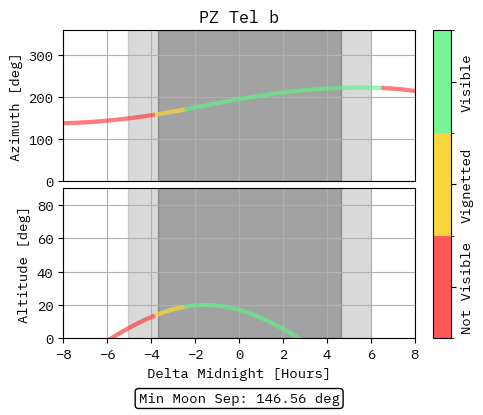

37.7055093336981 283.48917077617705 2
37.37500468749975 283.5506748362324 2
37.044585852047575 283.6126343325415 2
36.71425384687556 283.67504729757786 0
36.384009697271054 283.7379118883011 0
36.053854434454564 283.80122638311735 0
35.723789095768495 283.86498917896023 0
35.39381472484102 283.9291987884957 0
35.06393237178775 283.9938538374319 0
34.7341430933663 284.0589530619483 0
34.404447953177986 284.1244953062181 0
34.07484802182097 284.1904795200421 0
33.74534437709085 284.25690475656825 0
33.41593810413321 284.32377017011316 0
33.08663029564187 284.39107501406426 0
32.75742205201851 284.45881863887354 0
32.42831448155602 284.52700049013015 0
32.09930870061131 284.59562010671283 0
31.770405833788995 284.6646771190171 0
31.44160701410128 284.7341712472596 0
31.11291338316547 284.80410229984597 0
30.784326091364754 284.87447017181364 0
30.45584629803324 284.945274843335 0
30.127475171632717 285.01651637828627 0
29.799213889931615 285.08819492287506 0
29.471063640183168 285.1603107

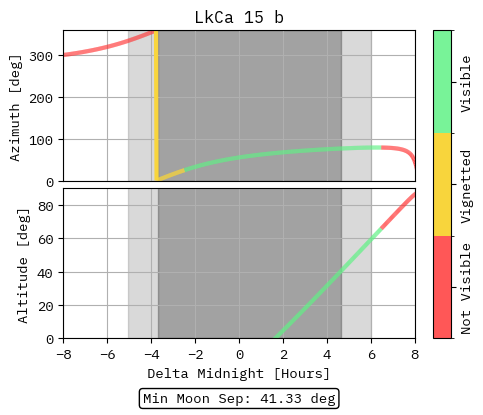

29.702681217988705 31.46807298795443 2
29.880018783060457 31.42461682061816 2
30.057133129252232 31.379888861489924 2
30.234017693193987 31.333883069160407 2
30.410665871587664 31.286593365192665 2
30.58707102072274 31.23801363490552 2
30.76322645598787 31.18813772819908 2
30.939125451396773 31.13695946041822 2
31.11476123909537 31.08447261326475 2
31.29012700889575 31.03067093574614 2
31.465215907787314 30.97554814517683 2
31.64002103947596 30.919097928217642 2
31.81453546390096 30.86131394197068 2
31.98875219678061 30.802189815114254 2
32.162664209137176 30.74171914909542 2
32.336264426846185 30.679895519366685 2
32.50954573017762 30.61671247667863 2
32.682500953347365 30.552163548424257 2
32.855122884068315 30.48624224003961 2
33.027404263119315 30.418942036455512 2
33.19933778390071 30.350256403613784 2
33.37091609201551 30.28017879003434 2
33.54213178484489 30.20870262844663 2
33.7129774111354 30.13582133748038 2
33.88344547059325 30.061528323418685 2
34.05352841348702 29.98581698

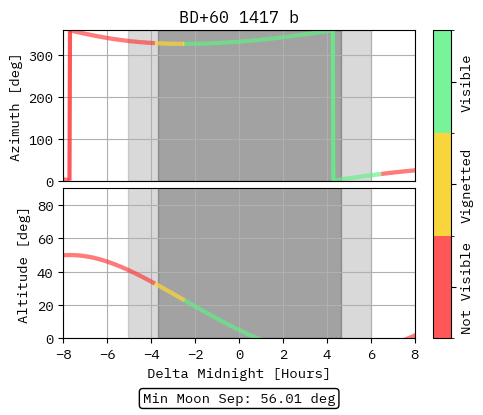

-10.246082826440585 292.6150968172412 0
-10.559702798699833 292.76173839158054 0
-10.872985144026044 292.9092744765283 0
-11.185925713325146 293.05771571165405 0
-11.498520296736245 293.2070728611294 0
-11.810764622596526 293.3573568154284 0
-12.1226543563778 293.50857859303363 0
-12.434185099626651 293.66074934216346 0
-12.745352388849108 293.81388034249056 0
-13.05615169441937 293.96798300689153 0
-13.366578419423945 294.1230688831827 0
-13.676627898530587 294.27914965588604 0
-13.986295396792187 294.4362371479803 0
-14.29557610847465 294.59434332268137 0
-14.60446515582062 294.7534802852068 0
-14.912957587828108 294.91366028456406 0
-15.221048378985307 295.0748957153318 0
-15.52873242799321 295.2371991194498 0
-15.836004556456254 295.40058318800664 0
-16.14285950757262 295.5650607630405 0
-16.44929194476708 295.73064483932257 0
-16.755296450335223 295.8973485661583 0
-17.06086752404212 296.0651852491755 0
-17.365999581705392 296.2341683521133 0
-17.67068695375297 296.4043114986067 0

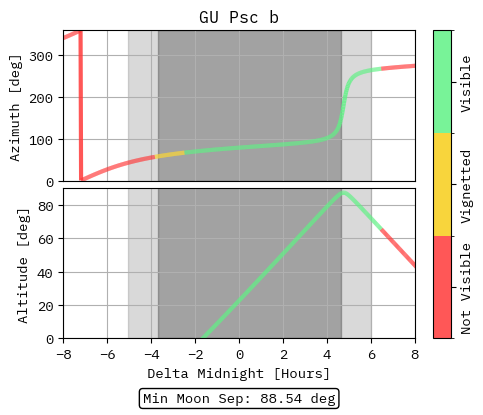

-35.32209335992004 106.85572515146333 0
-34.99681906121708 106.90876405326182 0
-34.67163682418124 106.96242721705967 0
-34.34654800933133 107.0167105499098 0
-34.021553980117545 107.07161013316846 0
-33.6966561032404 107.1271222182553 0
-33.37185574897472 107.18324322256984 0
-33.04715429146527 107.23996972556394 0
-32.722553109055895 107.29729846495353 0
-32.39805358456937 107.3552263330787 0
-32.07365710562973 107.41375037339064 0
-31.749365064934526 107.47286777707642 0
-31.425178860569673 107.53257587980059 0
-31.10109989627524 107.59287215857537 0
-30.777129581752728 107.65375422873818 0
-30.453269332932006 107.71521984104778 0
-30.12952057225893 107.7772668788833 0
-29.8058847289705 107.83989335554865 0
-29.482363239377683 107.90309741167472 0
-29.15895754712359 107.96687731272192 0
-28.835669103475492 108.03123144656861 0
-28.512499367579597 108.09615832119573 0
-28.189449806737123 108.16165656245327 0
-27.86652189667048 108.22772491191152 0
-27.54371712179001 108.2943622247923

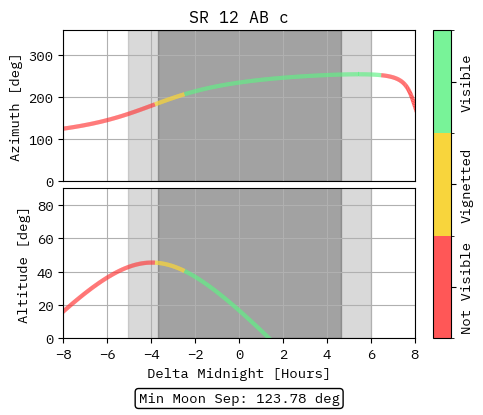

-27.725607496654593 217.27351973961393 0
-27.93142484261855 217.25328222873733 0
-28.137143589685582 217.23176011783326 0
-28.342757624425126 217.2089460997616 0
-28.548260793302518 217.18483277449897 0
-28.75364690188893 217.159412648712 0
-28.958909714057445 217.13267813535197 0
-29.164042951185788 217.10462155326974 0
-29.369040291327487 217.07523512685586 0
-29.573895368403978 217.04451098570158 0
-29.778601771359185 217.01244116428865 0
-29.983153043336372 216.97901760170117 0
-30.187542680817533 216.94423214136978 0
-30.391764132785152 216.90807653084005 0
-30.595810799847342 216.8705424215754 0
-30.79967603338016 216.83162136878852 0
-31.003353134647366 216.79130483130766 0
-31.206835353919757 216.74958417147684 0
-31.410115889580688 216.70645065509348 0
-31.61318788723939 216.66189545138073 0
-31.816044438814423 216.61590963300438 0
-32.01867858163331 216.56848417612562 0
-32.22108329751091 216.5196099605004 0
-32.42325151182669 216.46927776962224 0
-32.62517609259502 216.41747

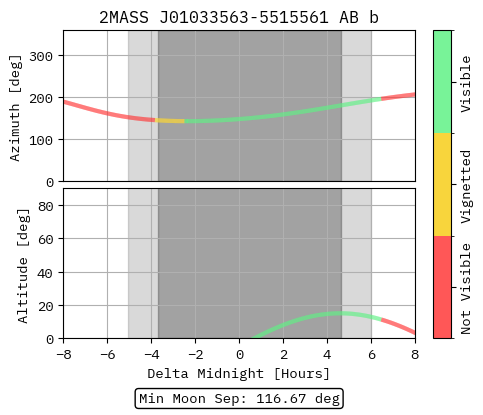

-32.811765953439 313.72925931669164 0
-33.05683619346837 314.0044220340072 0
-33.30076778576305 314.28178658810845 0
-33.543545878580446 314.5613711090917 0
-33.78515543495204 314.8431936752877 0
-34.02558123178529 315.12727230283053 0
-34.26480785903386 315.41362493480943 0
-34.502819718965526 315.70226943002626 0
-34.739601025487694 315.9932235512955 0
-34.97513580359616 316.28650495335324 0
-35.20940788888432 316.58213117028413 0
-35.44240092718666 316.8801196025443 0
-35.67409837429372 317.18048750348777 0
-35.90448349581066 317.48325196547455 0
-36.13353936709994 317.7884299054711 0
-36.3612488733724 318.0960380502117 0
-36.58759470988906 318.4060929208614 0
-36.8125593823032 318.7186108172046 0
-37.03612520713482 319.03360780133715 0
-37.258274312406286 319.3510996808908 0
-37.478988638404424 319.67110199172777 0
-37.69824993862557 319.99362998017676 0
-37.916039780868815 320.3186985847484 0
-38.132339548506536 320.64632241736314 0
-38.347130441930524 320.976515744081 0
-38.56039

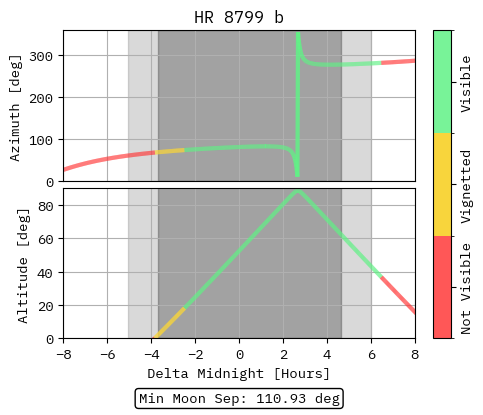

-32.811765953439 313.72925931669164 0
-33.05683619346837 314.0044220340072 0
-33.30076778576305 314.28178658810845 0
-33.543545878580446 314.5613711090917 0
-33.78515543495204 314.8431936752877 0
-34.02558123178529 315.12727230283053 0
-34.26480785903386 315.41362493480943 0
-34.502819718965526 315.70226943002626 0
-34.739601025487694 315.9932235512955 0
-34.97513580359616 316.28650495335324 0
-35.20940788888432 316.58213117028413 0
-35.44240092718666 316.8801196025443 0
-35.67409837429372 317.18048750348777 0
-35.90448349581066 317.48325196547455 0
-36.13353936709994 317.7884299054711 0
-36.3612488733724 318.0960380502117 0
-36.58759470988906 318.4060929208614 0
-36.8125593823032 318.7186108172046 0
-37.03612520713482 319.03360780133715 0
-37.258274312406286 319.3510996808908 0
-37.478988638404424 319.67110199172777 0
-37.69824993862557 319.99362998017676 0
-37.916039780868815 320.3186985847484 0
-38.132339548506536 320.64632241736314 0
-38.347130441930524 320.976515744081 0
-38.56039

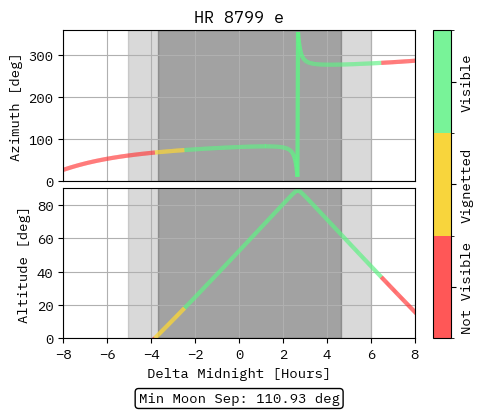

-32.811765953439 313.72925931669164 0
-33.05683619346837 314.0044220340072 0
-33.30076778576305 314.28178658810845 0
-33.543545878580446 314.5613711090917 0
-33.78515543495204 314.8431936752877 0
-34.02558123178529 315.12727230283053 0
-34.26480785903386 315.41362493480943 0
-34.502819718965526 315.70226943002626 0
-34.739601025487694 315.9932235512955 0
-34.97513580359616 316.28650495335324 0
-35.20940788888432 316.58213117028413 0
-35.44240092718666 316.8801196025443 0
-35.67409837429372 317.18048750348777 0
-35.90448349581066 317.48325196547455 0
-36.13353936709994 317.7884299054711 0
-36.3612488733724 318.0960380502117 0
-36.58759470988906 318.4060929208614 0
-36.8125593823032 318.7186108172046 0
-37.03612520713482 319.03360780133715 0
-37.258274312406286 319.3510996808908 0
-37.478988638404424 319.67110199172777 0
-37.69824993862557 319.99362998017676 0
-37.916039780868815 320.3186985847484 0
-38.132339548506536 320.64632241736314 0
-38.347130441930524 320.976515744081 0
-38.56039

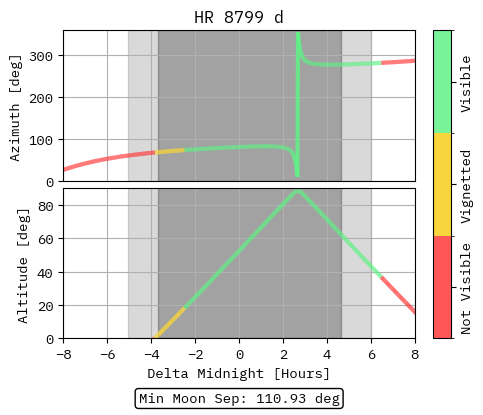

-33.45192433848102 102.34247415610166 0
-33.11990466976836 102.41719939333302 0
-32.78798053488632 102.49224531611723 0
-32.45615291442165 102.56761324827201 0
-32.1244227978717 102.6433045627301 0
-31.79279118377245 102.71932068103143 0
-31.46125907983843 102.7956630728434 0
-31.129827503080524 102.8723332555161 0
-30.79849747996423 102.9493327936573 0
-30.467270046522973 103.02666329874585 0
-30.136146248521378 103.10432642876059 0
-29.80512714157221 103.18232388784631 0
-29.474213791303015 103.26065742599391 0
-29.143407273476566 103.33932883875575 0
-28.812708674159946 103.4183399669738 0
-28.482119089856337 103.4976926965399 0
-28.151639627662565 103.57738895817276 0
-27.821271405418702 103.65743072721857 0
-27.491015551869584 103.73782002347056 0
-27.160873206804887 103.81855891101445 0
-26.830845521238505 103.89964949808486 0
-26.500933657552714 103.9810939369501 0
-26.171138789668724 104.06289442380991 0
-25.841462103209892 104.14505319871398 0
-25.511904795669658 104.227572545

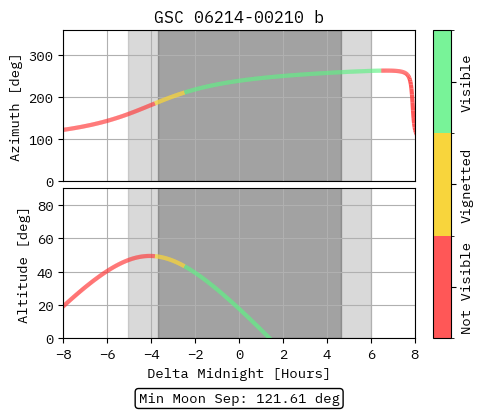

11.033555996277482 139.63474094092663 1
11.253318285506209 139.80839443119217 1
11.472290935104686 139.9832141920468 1
11.690466606066904 140.1592037898067 1
11.907837909708771 140.33636677119839 1
12.124397407645617 140.51470666129433 1
12.340137611778538 140.6942269614059 1
12.55505098431253 140.87493114695252 1
12.769129937766204 141.05682266527242 1
12.982366835028841 141.23990493342055 1
13.194753989404045 141.4241813359031 1
13.406283664702471 141.60965522239954 1
13.61694807532262 141.79632990542004 1
13.826739386381123 141.98420865795143 1
14.035649713833388 142.17329471103753 1
14.243671124639148 142.36359125134345 1
14.45079563693314 142.555101418667 1
14.65701522022407 142.74782830341695 1
14.862321795608421 142.94177494404653 1
15.066707236021518 143.13694432446155 1
15.270163366488191 143.33333937136803 1
15.472681964419808 143.53096295160256 1
15.674254759920293 143.72981786941014 1
15.874873436122416 143.92990686368847 1
16.07452962954753 144.13123260519316 1
16.27321493

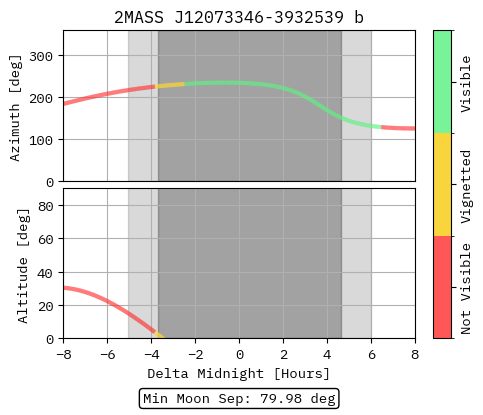

-28.30395323939132 120.72116588860949 0
-28.011777636091285 120.75074804717536 0
-27.719693372763693 120.7813854952732 0
-27.427703724483184 120.81307098684853 0
-27.13581195332981 120.84579748408262 0
-26.844021309218927 120.87955815340331 0
-26.552335030724436 120.91434636160353 0
-26.26075634586523 120.95015567206788 0
-25.96928847291176 120.98697984109806 0
-25.67793462113684 121.02481281434255 0
-25.386697991595696 121.06364872331802 0
-25.09558177784991 121.10348188203015 0
-24.804589166721204 121.14430678368005 0
-24.5137233389909 121.18611809746531 0
-24.222987470128004 121.2289106654612 0
-23.93238473097219 121.2726794995909 0
-23.64191828842679 121.31741977867343 0
-23.351591306131585 121.3631268455525 0
-23.06140694513539 121.40979620430028 0
-22.771368364537505 121.45742351749924 0
-22.481478722152797 121.5060046035913 0
-22.19174117513464 121.5555354343025 0
-21.902158880610767 121.60601213213289 0
-21.61273499630257 121.65743096791401 0
-21.323472681137677 121.70978835843

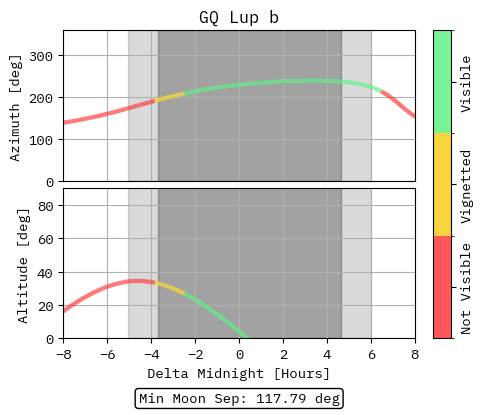

-34.11968729519944 108.0350605228639 0
-33.79651230255149 108.08665978085331 0
-33.47343296410201 108.13892481367714 0
-33.150450772608814 108.19185127860194 0
-32.827567223163584 108.24543501154844 0
-32.50478381355087 108.29967202288134 0
-32.182102044610865 108.35455849335088 0
-31.859523420573904 108.41009077018491 0
-31.53704944942699 108.4662653633163 0
-31.21468164323055 108.52307894175425 0
-30.892421518477274 108.58052833007864 0
-30.570270596399833 108.63861050506854 0
-30.24823040332095 108.69732259244479 0
-29.926302470953285 108.75666186373734 0
-29.60448833674095 108.81662573325771 0
-29.282789544159492 108.87721175518735 0
-28.961207643036346 108.93841762076642 0
-28.639744189858256 109.00024115558587 0
-28.31840074808598 109.06268031697512 0
-27.997178888443297 109.12573319148866 0
-27.676080189240718 109.1893979924763 0
-27.355106236659747 109.2536730577486 0
-27.03425862505952 109.31855684732233 0
-26.71353895727247 109.38404794124973 0
-26.3929488449004 109.450145037

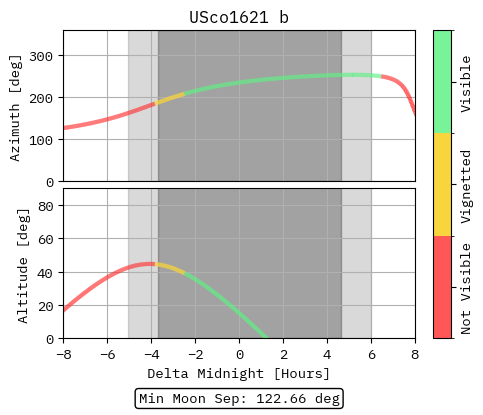

-9.326185002082534 171.36958156467162 0
-9.27537341878167 171.4371079233326 0
-9.224958856107408 171.50492936959472 0
-9.174943109167252 171.57304356223628 0
-9.125327959657492 171.6414481512509 0
-9.076115175790697 171.71014077787035 0
-9.027306512224916 171.7791190745859 0
-8.978903709989396 171.8483806651765 0
-8.93090849641588 171.91792316472907 0
-8.88332258506348 171.9877441796705 0
-8.836147675650272 172.05784130779017 0
-8.789385453978367 172.12821213827385 0
-8.743037591865631 172.19885425172887 0
-8.69710574707097 172.2697652202202 0
-8.651591563226136 172.34094260729825 0
-8.60649666976226 172.41238396803593 0
-8.561822681839901 172.48408684906198 0
-8.517571200277727 172.55604878859742 0
-8.473743811482903 172.6282673164914 0
-8.430342087378374 172.70073995426304 0
-8.387367585335374 172.77346421513673 0
-8.344821848101173 172.8464376040866 0
-8.302706403730253 172.91965761787688 0
-8.261022765514491 172.99312174510607 0
-8.219772431913919 173.06682746625106 0
-8.1789568864

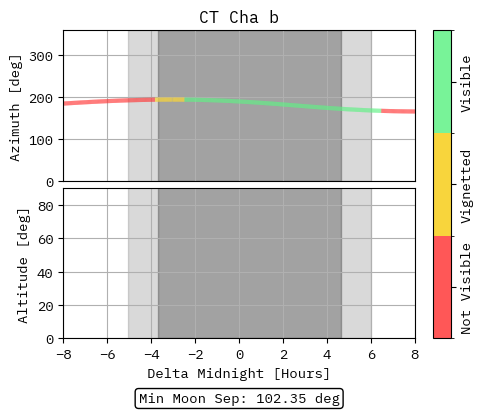

-10.05733384496412 130.66753379811922 0
-9.799661924335343 130.75129660446237 0
-9.542316261973449 130.83602104931384 0
-9.285301147944432 130.92170711579413 0
-9.028620890921278 131.00835486177573 0
-8.772279818637339 131.09596441890355 0
-8.516282278344969 131.18453599162189 0
-8.260632637252971 131.27406985621698 0
-8.005335282991418 131.3645663598572 0
-7.7503946240378125 131.4560259196533 0
-7.495815090177779 131.54844902171334 0
-7.241601132926082 131.64183622021682 0
-6.987757225981905 131.7361881364823 0
-6.734287865644806 131.83150545805333 0
-6.481197571263756 131.92778893777702 0
-6.228490885653748 132.02503939289755 0
-5.976172375528181 132.12325770414745 0
-5.724246631920793 132.22244481484495 0
-5.472718270613029 132.32260172999125 0
-5.2215919325405915 132.42372951537774 0
-4.970872284226029 132.52582929668336 0
-4.720564018180193 132.62890225858504 0
-4.470671853319421 132.73294964386182 0
-4.2212005353732955 132.83797275250166 0
-3.972154837290982 132.94397294080807 0


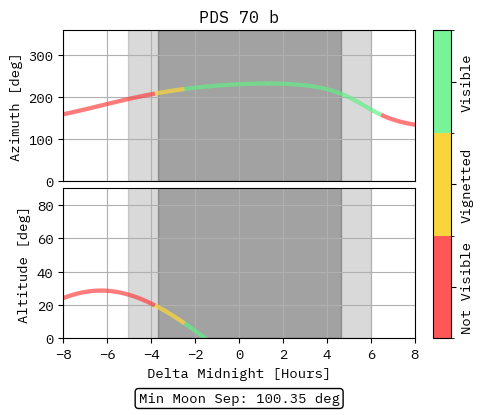

-15.360223200972484 125.3209050199635 0
-15.082988425129107 125.38995466462306 0
-14.805992497307878 125.45993500353065 0
-14.529239029255804 125.5308448991146 0
-14.2527316451852 125.60268331650143 0
-13.976473982286318 125.67544932223353 0
-13.700469691245301 125.74914208301207 0
-13.424722436739762 125.82376086447158 0
-13.14923589796342 125.89930502997167 0
-12.874013769109766 125.97577403942357 0
-12.599059759892958 126.05316744813048 0
-12.324377596026356 126.13148490566151 0
-12.04997101973874 126.2107261547372 0
-11.775843790248407 126.29089103014816 0
-11.501999684273796 126.37197945768312 0
-11.228442496509787 126.45399145308704 0
-10.955176040122113 126.53692712103238 0
-10.682204147231309 126.62078665411205 0
-10.40953066940343 126.70557033184753 0
-10.137159478119903 126.79127851972028 0
-9.865094465276208 126.87791166821063 0
-9.593339543648774 126.96547031186172 0
-9.321898647380028 127.05395506835272 0
-9.050775732454907 127.14336663758914 0
-8.779974777177353 127.23370

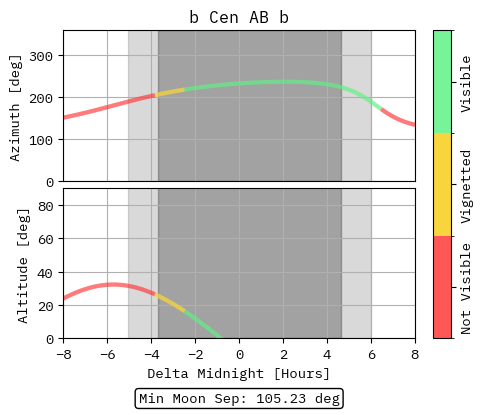

-35.316949413320955 105.97365854342898 0
-34.990196914999956 106.03023999677464 0
-34.663537583829154 106.08739196835008 0
-34.33697267845098 106.14511124046365 0
-34.01050346197722 106.20339474964133 0
-33.684131202256474 106.26223958295441 0
-33.357857172148066 106.32164297448473 0
-33.03168264976945 106.38160230192847 0
-32.7056089187788 106.44211508332161 0
-32.37963726860936 106.50317897389776 0
-32.053768994748275 106.5647917630563 0
-31.72800539896612 106.62695137145369 0
-31.4023477895914 106.68965584819644 0
-31.0767974817357 106.7529033681488 0
-30.751355797563203 106.8166922293338 0
-30.426024066519922 106.88102085044031 0
-30.100803625585367 106.94588776841972 0
-29.77569581951241 107.01129163617628 0
-29.450702001076404 107.07723122034311 0
-29.1258235313001 107.1437053991478 0
-28.801061779714086 107.21071316035221 0
-28.476418124579954 107.27825359927876 0
-28.151893953136753 107.34632591690789 0
-27.827490661837754 107.41492941805076 0
-27.503209656588936 107.4840635095

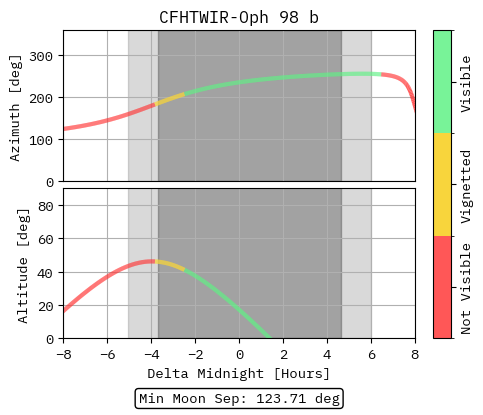

7.814223597082977 196.2555674205836 0
7.71859590968923 196.42262652414132 0
7.622019220487363 196.5890907784621 0
7.524497741166806 196.7549556816096 0
7.426035707968857 196.92021678786506 0
7.326637381132992 197.084869707501 0
7.226307044349106 197.24891010653326 0
7.125049004206187 197.41233370646836 0
7.022867589656056 197.57513628401603 0
6.91976715146684 197.7373136708085 0
6.815752061694585 197.89886175308112 0
6.710826713144326 198.05977647136112 0
6.604995518850032 198.22005382011832 0
6.498262911543601 198.37968984742452 0
6.390633343143104 198.53868065457604 0
6.282111284232933 198.6970223957215 0
6.172701223556307 198.8547112774639 0
6.062407667508996 199.01174355845484 0
5.951235139641538 199.1681155489705 0
5.839188180158259 199.3238236104863 0
5.726271345433862 199.47886415522146 0
5.612489207522824 199.63323364568916 0
5.497846353681823 199.78692859422316 0
5.382347385894793 199.9399455624981 0
5.265996920403657 200.09228116103674 0
5.1487995872444055 200.2439320487078 0

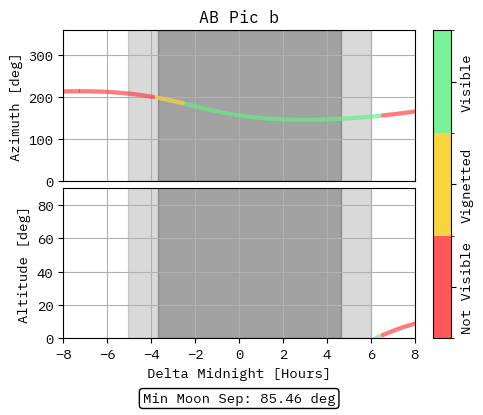

-29.123371686431273 104.82964561294892 0
-28.794826976324046 104.9039534264219 0
-28.466395972935192 104.97867909416013 0
-28.138079874698075 105.05382345464207 0
-27.809879890604805 105.12938741513408 0
-27.48179724038093 105.20537195086344 0
-27.153833154671705 105.28177810422955 0
-26.825988875206537 105.35860698405968 0
-26.49826565500332 105.43585976489408 0
-26.170664758528684 105.51353768631839 0
-25.843187461907835 105.59164205232067 0
-25.515835053088125 105.67017423069422 0
-25.188608832052243 105.74913565246283 0
-24.861510110986572 105.82852781134966 0
-24.534540214496342 105.90835226326679 0
-24.207700479785576 105.98861062584477 0
-23.88099225686183 106.06930457798636 0
-23.554416908733636 106.1504358594515 0
-23.22797581162 106.23200627046819 0
-22.90167035513912 106.31401767137632 0
-22.57550194253596 106.39647198228941 0
-22.249471990875424 106.47937118279124 0
-21.923581931262323 106.56271731165187 0
-21.597833209054055 106.6465124665708 0
-21.272227284078316 106.7307

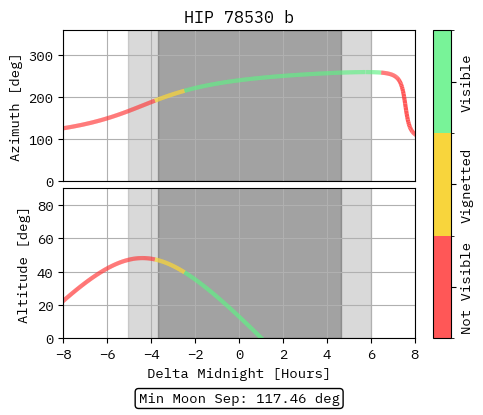

-30.976947505022896 106.43480885079288 0
-30.650966967404894 106.4999068420777 0
-30.325096560448944 106.5655265538992 0
-29.999337591361083 106.63166681913664 0
-29.673691375531426 106.69832658030546 0
-29.348159236760697 106.7655048875127 0
-29.02274250749595 106.83320089648929 0
-28.697442529042686 106.90141386670389 0
-28.372260651815036 106.97014315954226 0
-28.047198235539845 107.0393882365675 0
-27.72225664950809 107.1091486578389 0
-27.397437272779044 107.17942408030724 0
-27.07274149443213 107.25021425626393 0
-26.748170713771486 107.32151903186245 0
-26.423726340576934 107.39333834568934 0
-26.099409795317275 107.46567222740178 0
-25.775222509387344 107.53852079641571 0
-25.45116592533607 107.61188426065038 0
-25.12724149710517 107.68576291532317 0
-24.803450690245594 107.76015714180011 0
-24.47979498217174 107.83506740648741 0
-24.156275862379797 107.91049425977891 0
-23.83289483269121 107.98643833504417 0
-23.509653407488265 108.06290034766322 0
-23.186553113953146 108.1398

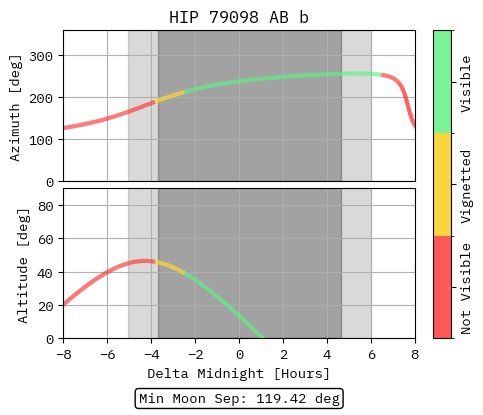

-36.18688808989932 106.52890820256461 0
-35.86105524920753 106.5810467627213 0
-35.53531121223687 106.63380952480101 0
-35.20965730989787 106.68719210592974 0
-34.88409487552808 106.74119030511208 0
-34.558625245213584 106.79580009866696 0
-34.23324975811506 106.85101763583346 0
-33.90796975676529 106.90683923454554 0
-33.58278658739962 106.9632613773589 0
-33.25770160023643 107.02028070753761 0
-32.932716149800605 107.07789402527895 0
-32.60783159519537 107.13609828408705 0
-32.28304930041746 107.19489058727356 0
-31.958370634622096 107.25426818459616 0
-31.6337969724297 107.31422846901445 0
-31.30932969419166 107.37476897357269 0
-30.984970186276374 107.43588736839433 0
-30.66071984134289 107.49758145778962 0
-30.33658005862183 107.55984917746885 0
-30.012552244170806 107.62268859186337 0
-29.688637811164686 107.68609789153923 0
-29.364838180147025 107.75007539071397 0
-29.041154779303103 107.81461952486146 0
-28.717589044723336 107.87972884840761 0
-28.39414242066607 107.94540203251

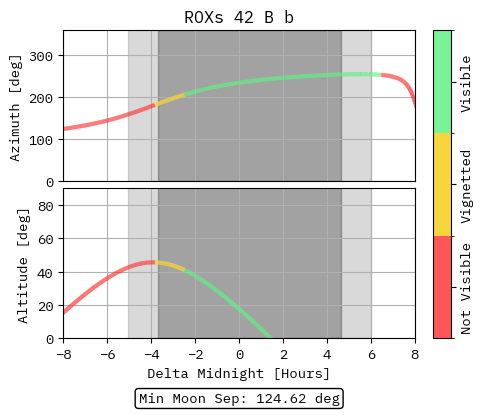

-61.12810604986746 116.04641537522129 0
-60.82251472515051 115.90068696889269 0
-60.51655185692443 115.75966330003514 0
-60.21023128611315 115.62320962971444 0
-59.90356633746634 115.49119631066505 0
-59.59656984425252 115.36349856541132 0
-59.28925417162604 115.23999627509042 0
-58.98163123871435 115.12057377843067 0
-58.67371253956114 115.00511968040033 0
-58.36550916291487 114.89352667000917 0
-58.05703181101637 114.78569134683627 0
-57.748290817358814 114.68151405580937 0
-57.43929616356573 114.58089872985175 0
-57.13005749535249 114.48375273996677 0
-56.820584137709716 114.3899867524134 0
-56.51088510927631 114.29951459258818 0
-56.20096913600543 114.21225311529261 0
-55.89084466413237 114.12812208105319 0
-55.58051987250377 114.04704403819451 0
-55.27000268427215 113.9689442103663 0
-54.959300778047435 113.89375038926539 0
-54.64842159846844 113.82139283227328 0
-54.33737236628092 113.75180416477748 0
-54.02616008792104 113.68491928693518 0
-53.71479156464004 113.62067528465971 0

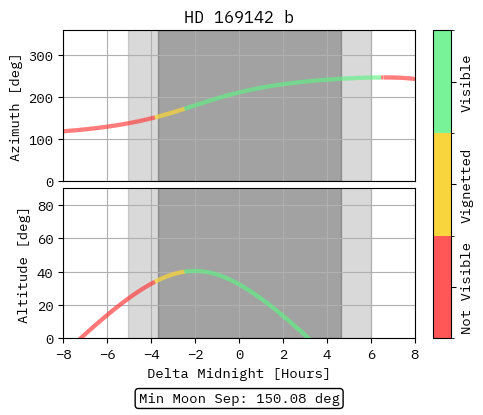

-0.3378624822361061 151.68664098403627 0
-0.17695480548652154 151.80786615413672 0
-0.01668320499623993 151.9299300008359 0
0.1429472076723489 152.0528310834023 1
0.30193131648358307 152.1765679440221 1
0.46026400107875254 152.30113910695871 1
0.6179401369288297 152.42654307770684 1
0.7749545955060149 152.5527783421548 1
0.9313022444445084 152.67984336573127 1
1.0869779477306938 152.8077365925685 1
1.2419765658784503 152.936456444647 1
1.3962929561346045 153.06600132095784 1
1.5499219726698268 153.19636959664655 1
1.7028584667993358 153.3275596221748 1
1.8550972871900815 153.4595697224645 1
2.006633280093738 153.59239819605725 1
2.1574612895763403 153.72604331426447 1
2.3075761577607836 153.86050332032247 1
2.4569727250724998 153.9957764285438 1
2.6056458305037125 154.13186082347946 1
2.753590311869001 154.2687546590669 1
2.9008010060856066 154.40645605779463 1
3.047272749451023 154.5449631098586 1
3.1930003779325498 154.6842738723241 1
3.3379787274644084 154.82438636828888 1
3.4822026

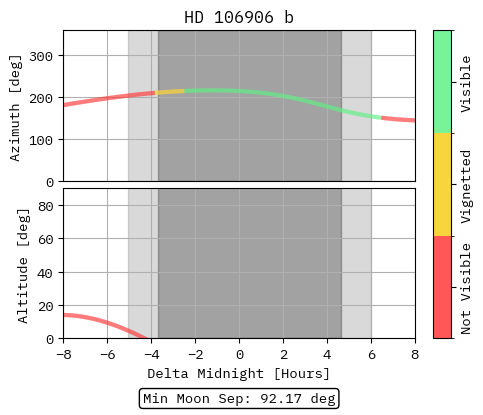

-11.751811876292615 326.680471635481 0
-11.938084206519918 326.8626776399379 0
-12.12344864799567 327.0459733457459 0
-12.307897882659459 327.2303594838943 0
-12.491424564515729 327.41583672263204 0
-12.674021320082648 327.6024056653912 0
-12.855680748854901 327.7900668486883 0
-13.036395423799787 327.97882074002376 0
-13.21615789185248 328.16866773574503 0
-13.394960674456964 328.3596081589211 0
-13.572796268102245 328.5516422571771 0
-13.749657144905182 328.74477020054206 0
-13.925535753189383 328.93899207925807 0
-14.100424518111236 329.1343079016049 0
-14.274315842283134 329.33071759168655 0
-14.447202106439626 329.5282209872309 0
-14.61907567011319 329.7268178373659 0
-14.789928872338395 329.9265078003935 0
-14.959754032373242 330.1272904415496 0
-15.128543450456046 330.3291652307719 0
-15.296289408566533 330.5321315404399 0
-15.462984171229191 330.7361886431321 0
-15.628619986328522 330.94133570936594 0
-15.793189085952415 331.1475718053403 0
-15.956683687258824 331.3548958906753

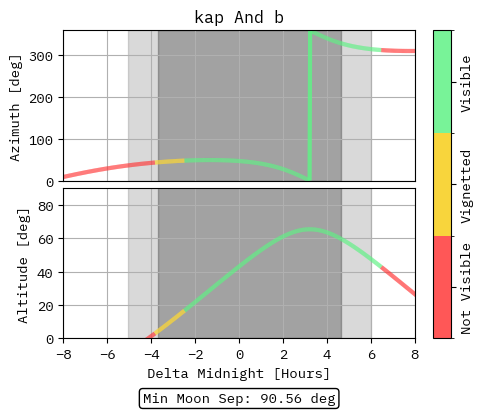

34.737664340443715 83.49648636482898 2
35.075432318875016 83.59238786819769 2
35.413263817754114 83.68835257912176 2
35.7511579333571 83.78438801996842 2
36.08911376462924 83.88050182833581 2
36.42713041296212 83.97670176157085 2
36.76520698195661 84.07299570144409 2
37.10334257720597 84.16939165899839 2
37.44153630603528 84.26589777956137 2
37.779787277283596 84.36252234795423 2
38.118094601032475 84.45927379387838 2
38.45645738837842 84.55616069751632 2
38.79487475115078 84.65319179532894 2
39.13334580167304 84.75037598608662 2
39.471869652470566 84.84772233711743 2
39.81044541601165 84.9452400908083 2
40.149072204417294 85.0429386713525 2
40.4877491291745 85.14082769176581 2
40.826475300831184 85.23891696117813 2
41.16524982870747 85.33721649242455 2
41.50407182056011 85.43573650993196 2
41.8429403822763 85.53448745793884 2
42.18185461753327 85.63348000904611 2
42.52081362745702 85.73272507312561 2
42.859816510268836 85.83223380660155 2
43.198862360921865 85.93201762212449 2
43.5379

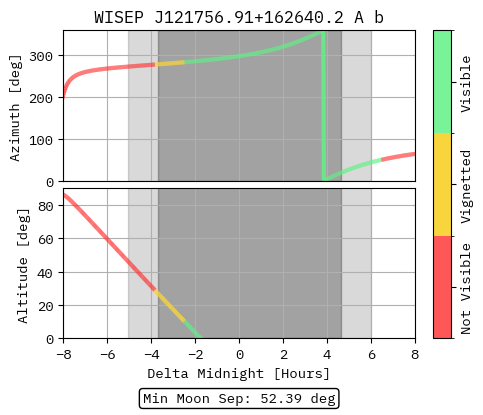

-28.558704949506176 109.25481464576232 0
-28.237856609843696 109.31668545922842 0
-27.917130305807834 109.37918042423395 0
-27.596527643862885 109.44229763578483 0
-27.27605023815356 109.50603531573748 0
-26.955699710809842 109.57039181049221 0
-26.635477692260043 109.63536558876766 0
-26.315385821519143 109.70095523946057 0
-25.99542574651281 109.7671594695756 0
-25.67559912435588 109.83397710223937 0
-25.355907621675467 109.90140707477784 0
-25.03635291488678 109.96944843687336 0
-24.716936690514817 110.0381003487803 0
-24.39766064546863 110.10736207961602 0
-24.07852648736015 110.17723300570619 0
-23.75953593478505 110.24771260899958 0
-23.44069071762634 110.31880047553804 0
-23.121992577348013 110.39049629398602 0
-22.803443267298338 110.46279985421424 0
-22.485044552991194 110.53571104594272 0
-22.166798212422776 110.60922985742833 0
-21.848706036353306 110.68335637421175 0
-21.53076982861216 110.75809077790844 0
-21.212991406395222 110.83343334504973 0
-20.895372600564325 110.909

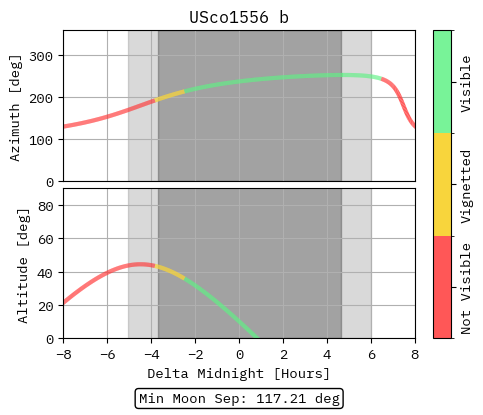

-30.677087490569576 103.41683398899917 0
-30.34649347171302 103.49279342524166 0
-30.016004848234026 103.5691100866986 0
-29.685622703259597 103.64578533508902 0
-29.355348129944826 103.72282058604026 0
-29.02518223162118 103.8002173085819 0
-28.695126121956346 103.87797702466806 0
-28.365180925092996 103.95610130873449 0
-28.03534777582747 104.03459178727566 0
-27.705627819744173 104.1134501384604 0
-27.376022213399747 104.19267809176326 0
-27.04653212446205 104.27227742763318 0
-26.717158731897566 104.35224997717678 0
-26.387903226114553 104.43259762187714 0
-26.058766809153685 104.51332229332569 0
-25.72975069484243 104.59442597298703 0
-25.400856108975496 104.6759106919804 0
-25.072084289487 104.75777853088584 0
-24.743436486635566 104.84003161956937 0
-24.414913963167585 104.92267213703505 0
-24.086517994520616 105.0057023112882 0
-23.75824986899182 105.08912441922794 0
-23.43011088793258 105.17294078655306 0
-23.102102365937018 105.25715378768946 0
-22.774225631034373 105.3417658

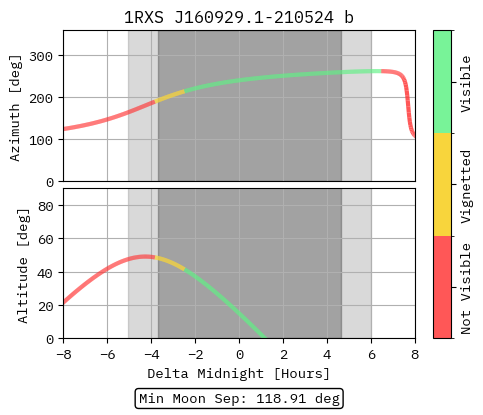

19.047322432334585 86.72115904047666 2
19.386708778366703 86.83707177070436 2
19.72613308914167 86.95310138421476 2
20.065594011641064 87.06925680471767 2
20.40509019099053 87.18554703915184 2
20.744620270055865 87.30198118096578 2
21.08418288902274 87.41856841346824 2
21.423776684995094 87.53531801326346 2
21.763400291547814 87.65223935375228 2
22.103052338320087 87.76934190873173 2
22.44273145055305 87.88663525606367 2
22.782436248669274 88.00412908144887 2
23.12216534779565 88.12183318227693 2
23.46191735732747 88.23975747158879 2
23.801690880436247 88.35791198212233 2
24.141484513609356 88.47630687047558 2
24.4812968461552 88.59495242136828 2
24.82112645971008 88.71385905201907 2
25.16097192772402 88.83303731663456 2
25.500831814960545 88.9524979110272 2
25.84070467694732 89.07225167734457 2
26.180589059453474 89.1923096089418 2
26.520483497930243 89.31268285537983 2
26.860386516948523 89.433382727567 2
27.20029662962141 89.55442070304476 2
27.540212337014744 89.67580843142534 2
27

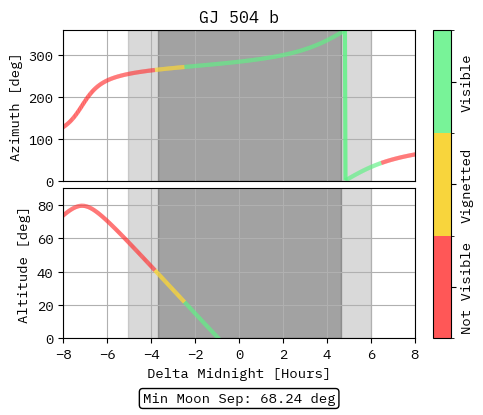

-21.685514167684868 250.63375175012575 0
-22.006280762227732 250.71121909423306 0
-22.32719863103561 250.78812963292475 0
-22.648266107452894 250.8644841218191 0
-22.969481538447113 250.94028323138173 0
-23.29084328434696 251.0155275459886 0
-23.612349718571505 251.0902175629438 0
-23.93399922738387 251.16435369145822 0
-24.25579020960839 251.23793625157407 0
-24.577721076393736 251.31096547305287 0
-24.899790250930714 251.38344149420374 0
-25.221996168217235 251.4553643606731 0
-25.544337274777522 251.52673402417125 0
-25.866812028428622 251.59755034115705 0
-26.189418898002124 251.66781307145652 0
-26.512156363104214 251.737521876834 0
-26.835022913852768 251.80667631949848 0
-27.15801705062457 251.87527586055208 0
-27.481137283792613 251.94331985837314 0
-27.804382133486456 252.01080756694003 0
-28.127750129315846 252.07773813407906 0
-28.451239810130534 252.14411059965167 0
-28.774849723756187 252.20992389366407 0
-29.098578426738378 252.27517683430477 0
-29.422424484084335 252.339

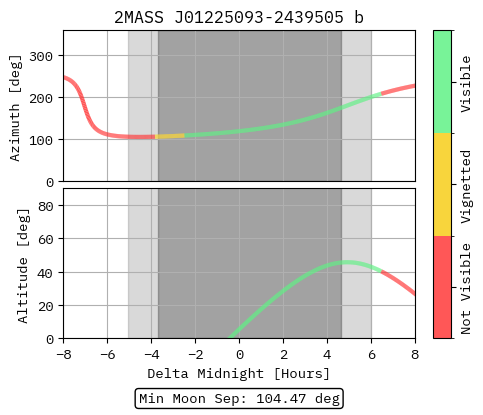

-16.071265047486236 337.7941331624819 0
-16.199148751512173 338.007819614472 0
-16.325854476094808 338.2224036309431 0
-16.451375515136732 338.43788069572355 0
-16.575705182320032 338.6542461679474 0
-16.69883681230174 338.87149528095034 0
-16.820763761919594 339.0896231411939 0
-16.94147941142052 339.3086247272438 0
-17.06097716568811 339.52849488876086 0
-17.179250455500426 339.7492283455628 0
-17.296292738783187 339.97081968669585 0
-17.412097501892237 340.19326336958017 0
-17.526658260891303 340.4165537191684 0
-17.639968562858016 340.64068492718036 0
-17.752021987184662 340.86565105135355 0
-17.86281214690334 341.09144601476754 0
-17.972332690012763 341.31806360520136 0
-18.080577300818412 341.5454974745476 0
-18.187539701278304 341.7737411382715 0
-18.293213652365278 342.00278797493866 0
-18.39759295542506 342.2326312257709 0
-18.50067145355411 342.46326399428307 0
-18.602443032976453 342.6946792459591 0
-18.70290162443002 342.926869807992 0
-18.80204120455784 343.15982836908074 

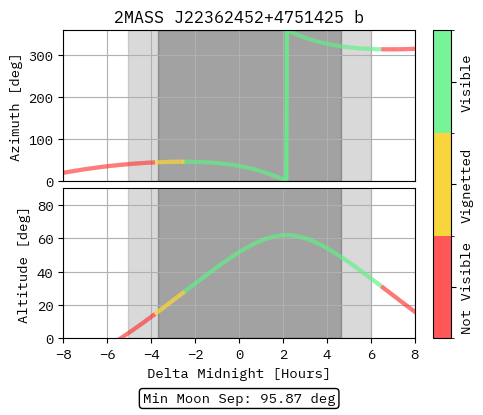

-6.758007644841286 182.16632290636815 0
-6.77110040169427 182.24860300912684 0
-6.784680703811745 182.33080520883308 0
-6.798748053002323 182.4129266615795 0
-6.813301933307966 182.49496452667267 0
-6.828341811033492 182.57691596674192 0
-6.84386713477648 182.65877814784443 0
-6.85987733545939 182.740548239576 0
-6.876371826360566 182.82222341517092 0
-6.8933500031485515 182.90380085161337 0
-6.910811243914961 182.98527772973537 0
-6.92875490921061 183.06665123432649 0
-6.947180342080126 183.1479185542305 0
-6.966086868099952 183.22907688245337 0
-6.985473795414804 183.3101234162587 0
-7.0053404147770575 183.39105535727217 0
-7.025685999585686 183.47186991157898 0
-7.0465098059267115 183.55256428982324 0
-7.067811072613884 183.6331357073037 0
-7.0895890212314825 183.71358138407464 0
-7.111842856175877 183.7938985450364 0
-7.134571764700149 183.87408442003445 0
-7.157774916957937 183.9541362439514 0
-7.1814514660487365 184.03405125680038 0
-7.205600548063949 184.11382670381693 0
-7.2302

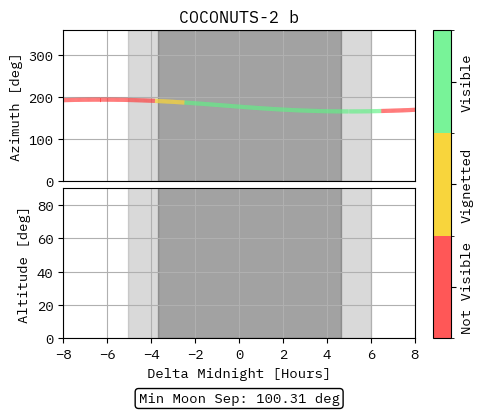

-4.348035692907653 77.58678018151657 0
-4.015977650157614 77.71466636080619 0
-3.6837584630991427 77.84207922542018 0
-3.351380363512064 77.96902766597103 0
-3.018845554959647 78.095520500719 0
-2.6861562133672456 78.22156647761895 0
-2.3533144876009975 78.34717427634529 0
-2.020322500012994 78.47235251030897 0
-1.687182347015677 78.5971097286432 0
-1.3538960996004217 78.72145441819131 0
-1.020465803895113 78.84539500546134 0
-0.6868934816647402 78.96893985858485 0
-0.3531811308517717 79.0920972892442 0
-0.0193307260596647 79.2148755546053 0
0.31465578092474905 79.33728285922116 1
0.648776460655986 79.45932735693887 1
0.9830294055382862 79.58101715278747 1
1.3174127293518636 79.70236030486005 1
1.6519245667757718 79.82336482618348 1
1.9865630729418495 79.94403868658875 1
2.3213264229579575 80.06438981456063 1
2.6562128114751657 80.18442609909447 1
2.9912204522373522 80.30415539153879 1
3.326347577645998 80.42358550743639 1
3.661592438329287 80.54272422836078 1
3.9969533027185467 80.661

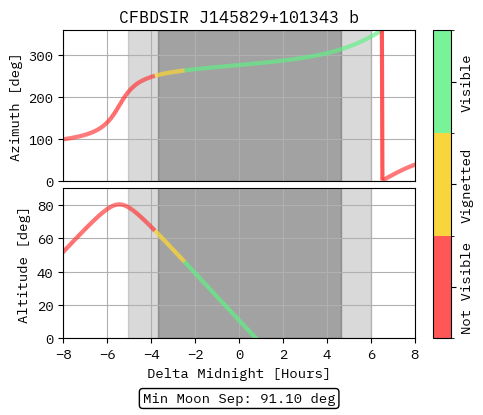

In [594]:
save_path = Path('targets')
save_path.mkdir(exist_ok=True)

# make custom cmap for the moon sep bounds
cmap = mcolors.ListedColormap(['#ff3a3ad9', '#f8d53c', '#61f286d9'])
bounds = [0,1,2,3]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

#cmap = mcolors.ListedColormap(['#ff3a3ad9', '#61f286d9'])
#bounds = [0,10,90]
#norm = mcolors.BoundaryNorm(bounds, cmap.N)

#cmap = mcolors.ListedColormap(['#ff3a3ad9', '#61f286d9'])
#bounds = [0,10,90]
#norm = mcolors.BoundaryNorm(bounds, cmap.N)

visibility=[]
for name, altaz_target in zip(data['pl_name'], altaz_data):

    moon_seps = angular_separation(altaz_target.az, altaz_target.alt, altaz_moon.az, altaz_moon.alt).to(u.degree).value

    for alt,az in zip(altaz_target.alt, altaz_target.az):
        vis = check_visibility(alt.to(u.degree).value,az.to(u.degree).value)
        visibility.append(vis)
        print(alt.to(u.degree).value,az.to(u.degree).value, vis)


    fig = plt.figure(figsize=(5,4))
    fig.subplots_adjust(hspace=0.05)

    # use gridspec here to make the colorbar play nicely
    gs = GridSpec(2, 2, width_ratios=[1, 0.05], height_ratios=[1, 1], wspace=0.1)
    axs = []
    axs.append(fig.add_subplot(gs[0, 0]))
    axs.append(fig.add_subplot(gs[1, 0]))

    #
    # make first plot
    #
    
    x = delta_midnight
    y = altaz_target.az
    z = visibility

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
    lc = LineCollection(segments, cmap=cmap, norm=norm, linewidth=2, label='Target')
    lc.set_array(z)
    lc.set_linewidth(3)
    axs[0].add_collection(lc)
        
    #axs[0].plot(delta_midnight, altaz_sun.az, label='Sun', color='orange', linestyle='--', alpha=0.5)
    #axs[0].plot(delta_midnight, altaz_moon.az, label='Moon', color='black', linestyle='--', alpha=0.5)
    #axs[0].plot(delta_midnight, altaz_target.az, color=cmap(norm(moon_sep[i])), label='Target', color='C0')
    
    #axs[0].set_xlabel('Hours')
    axs[0].set_ylabel('Azimuth [deg]')
    
    axs[0].set_ylim(0, 360)

    # get rid of ticks for this plot
    axs[0].get_xaxis().set_ticklabels([])
    axs[0].tick_params('x', length=0, width=0, which='major')

    axs[0].set_title(name) # title on top of first one

    #
    # make second plot
    #
    
    x = delta_midnight
    y = altaz_target.alt
    z = visibility

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
    lc = LineCollection(segments, cmap=cmap, norm=norm, linewidth=2, label='Target')
    lc.set_array(z)
    lc.set_linewidth(3)
    axs[1].add_collection(lc)
    
    #axs[1].plot(delta_midnight, altaz_sun.alt, label='Sun', color='orange', linestyle='--', alpha=0.5)
    #axs[1].plot(delta_midnight, altaz_moon.alt, label='Moon', color='black', linestyle='--', alpha=0.5)
    #axs[1].plot(delta_midnight, altaz_target.alt, label='Target', color='C0')
    
    axs[1].set_ylim(0, 90)
    
    axs[1].set_xlabel('Delta Midnight [Hours]')
    axs[1].set_ylabel('Altitude [deg]')
    
    #axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),fancybox=False, shadow=True, ncol=3)

    # Colorbar
    cax = fig.add_subplot(gs[:, 1])
    colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, ticks=bounds, spacing='proportional', orientation='vertical')
    cax.set_yticks([0.5, 1.5, 2.5])
    cax.set_yticklabels(['Not Visible', 'Vignetted', 'Visible'], va='center', rotation=90)
        
    #cax.set_ylabel('Moon Separation [deg]')
    
    for ax in axs:
        ax.set_xlim(-8,8)

        ax.fill_between(delta_midnight.value, 0 , 360 , altaz_sun.alt < 0 * u.deg, alpha=0.15, color='k')
        ax.fill_between(delta_midnight.value, 0 , 360 , altaz_sun.alt < -18 * u.deg, alpha=0.25, color='k')
        ax.grid()

    ax.text(0.5, -0.4, f'Min Moon Sep: {np.min(moon_seps):.2f} deg',
            horizontalalignment='center',
            verticalalignment='center',
            transform = axs[1].transAxes,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25'))

    plt.show()

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.plot(np.deg2rad(altaz_moon.az), altaz_moon.zen)

ax.set_rmin(0)
ax.set_rmax(90)

tick_spacing = 15
ax.set_rticks(np.arange(0,90+tick_spacing,tick_spacing))  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line

ax.grid(True)
ax.set_theta_direction(1)
ax.set_theta_offset(np.deg2rad(90))

ax.set_title('Azimuth, Zenith Angle')
plt.show()